In [96]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plot
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
import collections

In [86]:
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv')

In [3]:
x = ["listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered",
     "neighborhood_overview", "notes","transit","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id",
    "host_url","host_name","host_since","host_location","host_about","host_thumbnail_url","host_picture_url",
    "host_neighbourhood","host_listings_count","host_total_listings_count","host_has_profile_pic","host_identity_verified",
    "street","neighbourhood","neighbourhood_cleansed","city","state","zipcode","market","smart_location","country_code",
    "country","is_location_exact","square_feet","weekly_price","monthly_price","security_deposit","cleaning_fee",
    "calendar_updated","has_availability","calendar_last_scraped","requires_license","license","jurisdiction_names",
     "instant_bookable","require_guest_profile_picture","require_guest_phone_verification","calculated_host_listings_count",
     "host_response_time", "first_review" , "last_review","reviews_per_month","host_verifications"]

listings = listings.drop(columns= x)


listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_response_rate'].fillna(listings['host_response_rate'].mean(),inplace = True)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean(),inplace = True)

listings['extra_people'] = listings['extra_people'].str.replace(",", "")
listings['extra_people'] = listings['extra_people'].str.replace("$", "").astype("float")

listings['price'] = listings['price'].str.replace(",", "")
listings['price'] = listings['price'].str.replace("$", "").astype("float")

listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])

reviewColumns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in reviewColumns:
    listings[column].fillna(listings[column].mean(), inplace = True)
    

listings['host_is_superhost'].replace('f', 0 ,inplace=True)
listings['host_is_superhost'].replace('t', 1 ,inplace=True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(0)
listings

,id,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,96.000000,100.000000,0.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,moderate
1,953595,98.000000,100.000000,1.0,Queen Anne,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
2,3308979,67.000000,100.000000,0.0,Queen Anne,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,strict
3,7421966,94.886798,99.967159,0.0,Queen Anne,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,flexible
4,278830,100.000000,99.967159,0.0,Queen Anne,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,99.000000,100.000000,0.0,Other neighborhoods,47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",359.0,1,0.0,3,1125,18,32,32,32,1,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000,strict
3814,8902327,100.000000,100.000000,0.0,Capitol Hill,47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",79.0,3,25.0,2,29,6,26,44,273,2,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,moderate
3815,10267360,94.886798,99.967159,0.0,Rainier Valley,47.508453,-122.240607,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",93.0,2,20.0,1,7,29,59,88,88,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,moderate
3816,9604740,100.000000,99.967159,0.0,Capitol Hill,47.632335,-122.275530,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",99.0,1,0.0,3,1125,30,60,90,179,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,moderate


In [134]:
def returntruefalse(x,i):
    if i in x:
        return 1
    else:
        return 0
def cleanRatings(dataframe):
    dataframe=dataframe.copy()
    dataframe=dataframe.loc[:,['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                 'neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms',
                 'beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee',
                 'guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating',
                 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
                 'cancellation_policy']]
    
    dataframe['host_response_rate']=dataframe['host_response_rate'].str.replace('%','')
    dataframe['host_acceptance_rate']=dataframe['host_acceptance_rate'].str.replace('%','')
    dataframe['host_response_rate']=dataframe['host_response_rate'].astype('float64')/100
    dataframe['host_acceptance_rate']=dataframe['host_acceptance_rate'].astype('float64')/100
    dataframe['host_response_rate'].fillna(0,inplace=True)
    dataframe['host_acceptance_rate'].fillna(0,inplace=True)
    
    dataframe['host_is_superhost']=dataframe['host_is_superhost'].str.replace('f','0')
    dataframe['host_is_superhost']=dataframe['host_is_superhost'].str.replace('t','1')
    dataframe['instant_bookable']=dataframe['instant_bookable'].str.replace('f','0')
    dataframe['instant_bookable']=dataframe['instant_bookable'].str.replace('t','1')
    dataframe['host_is_superhost']=dataframe['host_is_superhost'].astype('float64')
    dataframe['instant_bookable']=dataframe['instant_bookable'].astype('float64')
    dataframe['host_is_superhost'].fillna(0,inplace=True)
    dataframe['instant_bookable'].fillna(0,inplace=True)
    
    dataframe['price']=dataframe['price'].str.replace('$','')
    dataframe['weekly_price']=dataframe['weekly_price'].str.replace('$','')
    dataframe['monthly_price']=dataframe['monthly_price'].str.replace('$','')
    dataframe['security_deposit']=dataframe['security_deposit'].str.replace('$','')
    dataframe['cleaning_fee']=dataframe['cleaning_fee'].str.replace('$','')
    dataframe['extra_people']=dataframe['extra_people'].str.replace('$','')
    dataframe['price']=dataframe['price'].str.replace(',','')
    
    dataframe['weekly_price']=dataframe['weekly_price'].str.replace(',','')
    dataframe['monthly_price']=dataframe['monthly_price'].str.replace(',','')
    dataframe['security_deposit']=dataframe['security_deposit'].str.replace(',','')
    dataframe['cleaning_fee']=dataframe['cleaning_fee'].str.replace(',','')
    dataframe['extra_people']=dataframe['extra_people'].str.replace(',','')
    dataframe['price']=dataframe['price'].astype('float64')
    
    dataframe['weekly_price']=dataframe['weekly_price'].astype('float64')
    dataframe['monthly_price']=dataframe['monthly_price'].astype('float64')
    dataframe['security_deposit']=dataframe['security_deposit'].astype('float64')
    dataframe['cleaning_fee']=dataframe['cleaning_fee'].astype('float64')
    dataframe['extra_people']=dataframe['extra_people'].astype('float64')
    dataframe['price'].fillna(0,inplace=True)
    
    dataframe['weekly_price'].fillna(0,inplace=True)
    dataframe['monthly_price'].fillna(0,inplace=True)
    dataframe['security_deposit'].fillna(0,inplace=True)
    dataframe['cleaning_fee'].fillna(0,inplace=True)
    dataframe['extra_people'].fillna(0,inplace=True)

    dataframe['amenities']=dataframe['amenities'].str.replace("{","")
    dataframe['amenities']=dataframe['amenities'].str.replace("}","")
    dataframe['amenities']=dataframe['amenities'].str.replace(" ","")
    dataframe['amenities']=dataframe['amenities'].str.replace('"','')
    dataframe['amenities']=dataframe['amenities'].str.replace(",","  ")
    dataframe['amenities']
    dataframe['amenities_length']=dataframe['amenities'].str.len()
    dataframe=dataframe.drop(['amenities'],axis=1)
    
    dataframe['host_response_time'].replace('within an hour',1, inplace=True)
    dataframe['host_response_time'].replace('within a few hours',2,inplace=True)
    dataframe['host_response_time'].replace('within a day',3,inplace=True)
    dataframe['host_response_time'].replace('a few days or more',4,inplace=True)
    
    dataframe['host_response_time'].fillna(method='ffill',inplace=True)
    
    dataframe['beds'].fillna(method='ffill',inplace=True)
    dataframe['bathrooms'].fillna(method='ffill',inplace=True)
    dataframe['bedrooms'].fillna(method='ffill',inplace=True)
    return dataframe

# Exploratory Data Analysis

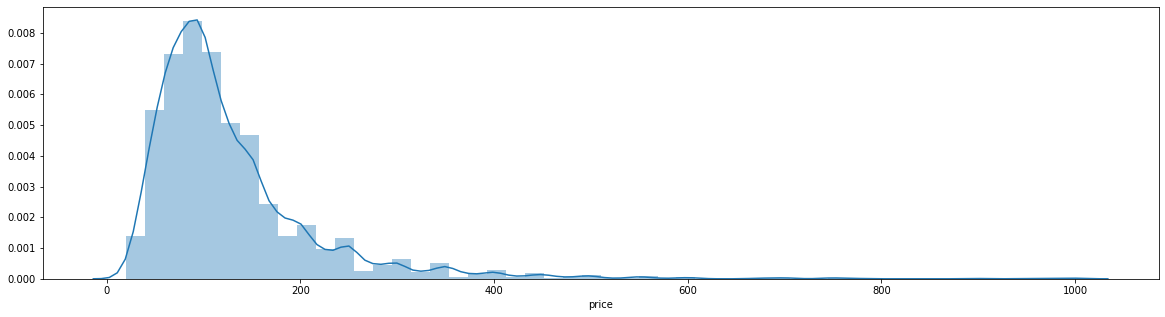

In [4]:
plt.figure(figsize=(20,5))
sb.distplot(listings["price"]);
plt.show()

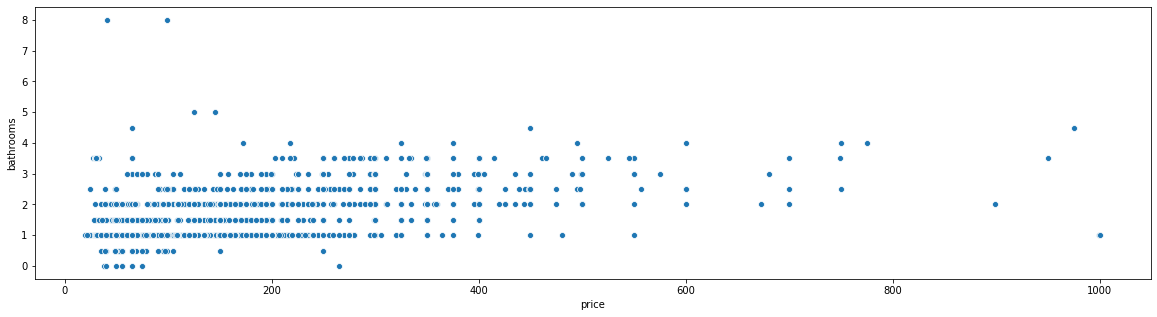

In [5]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bathrooms',data=listings)
plt.show()

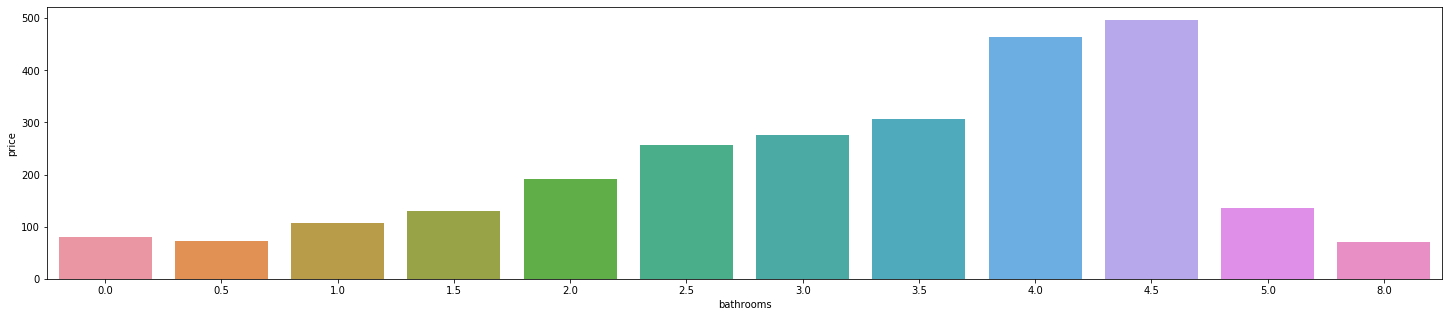

In [6]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bathrooms").mean()['price']).reset_index(), x = "bathrooms" , y = "price" )
plt.show()

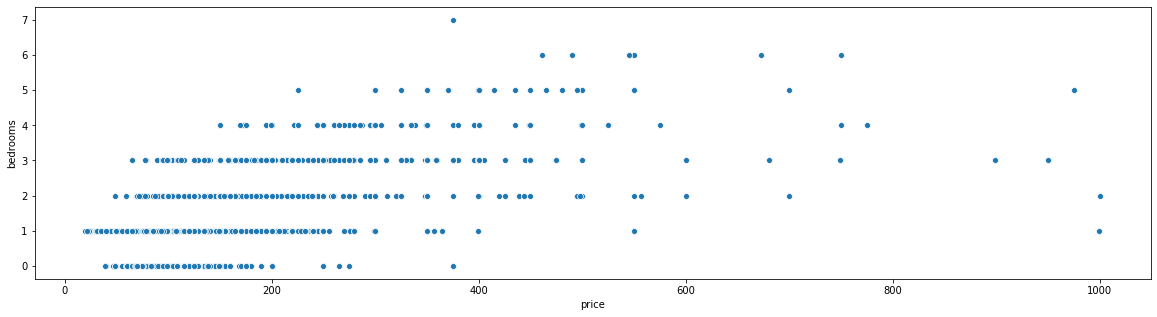

In [7]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bedrooms',data=listings)
plt.show()

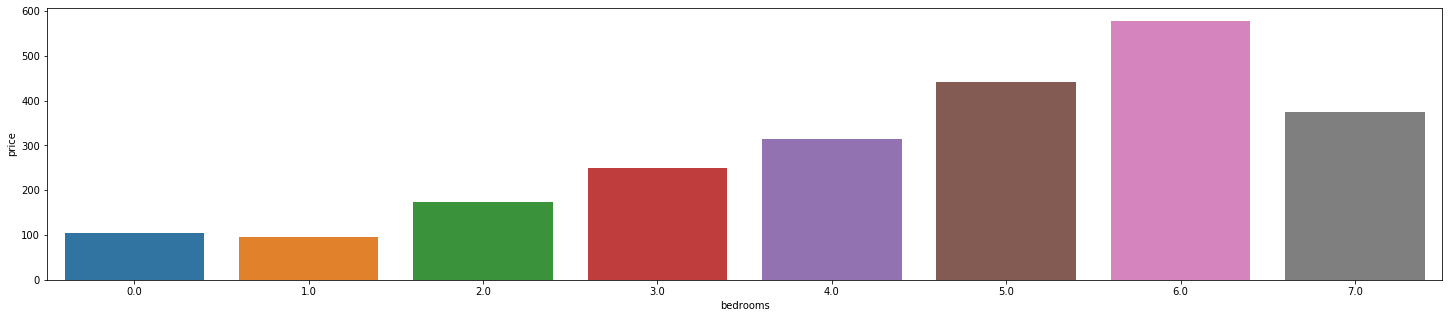

In [8]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bedrooms").mean()['price']).reset_index(), x = "bedrooms" , y = "price" )
plt.show()

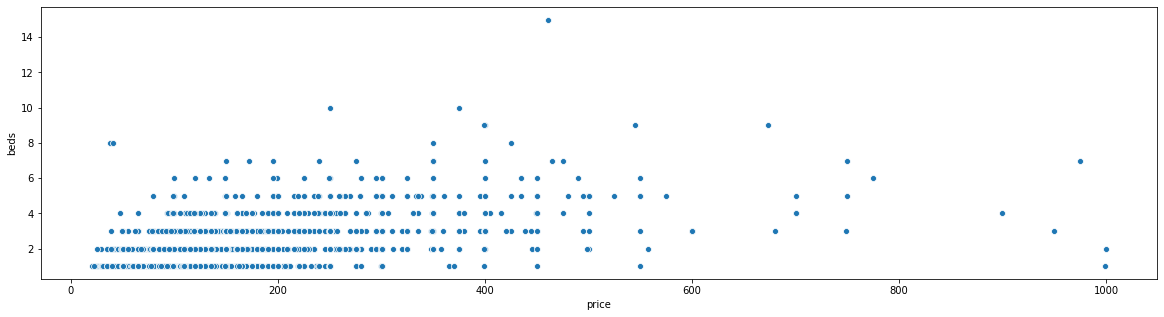

In [9]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='beds',data=listings)
plt.show()

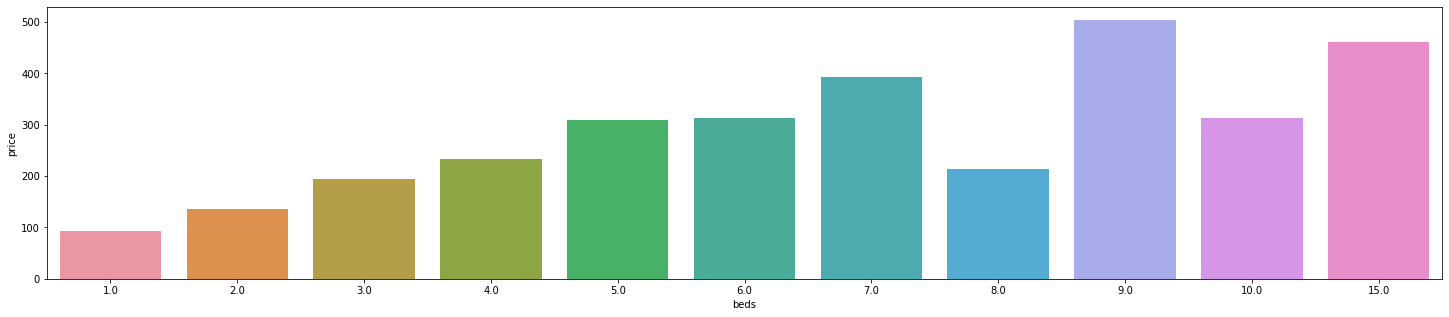

In [10]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame( listings.groupby("beds").mean()['price']).reset_index(), x = "beds" , y = "price" )
plt.show()

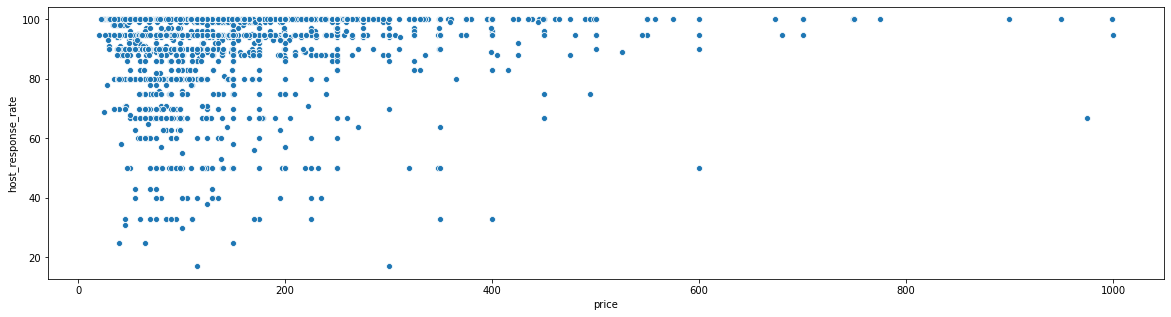

In [11]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_response_rate',data=listings)
plt.show()

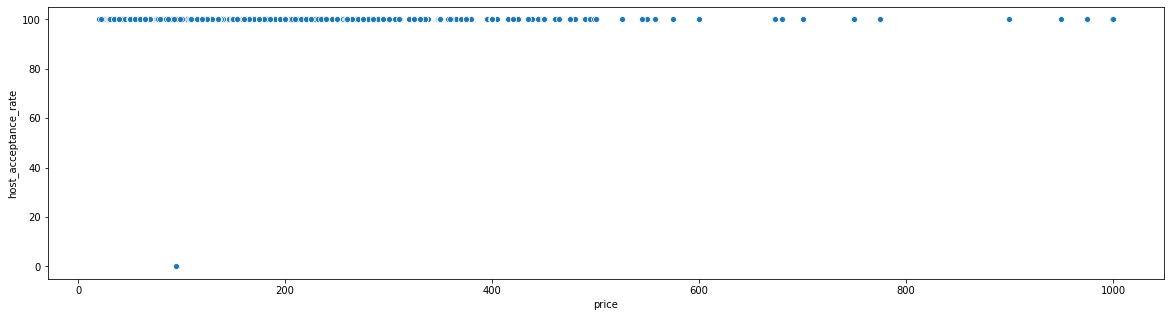

In [12]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_acceptance_rate',data=listings)
plt.show()

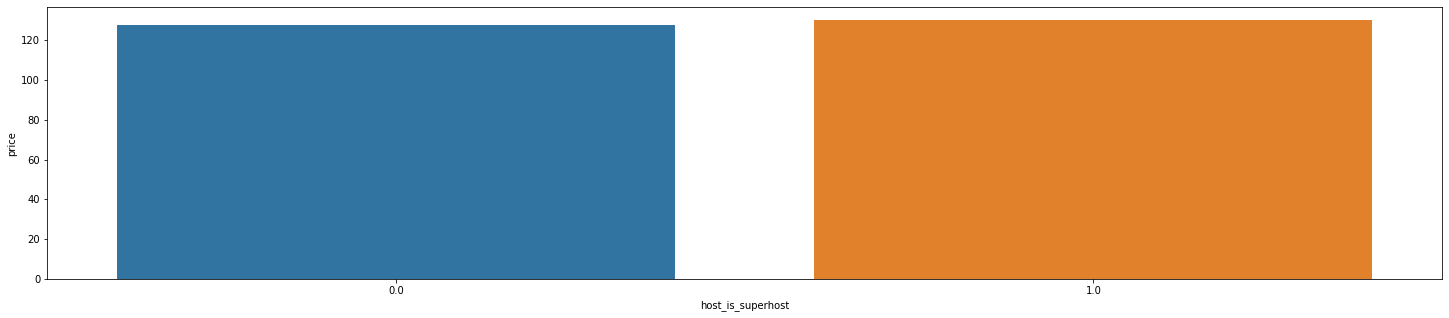

In [13]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("host_is_superhost").mean()['price']).reset_index(), x = "host_is_superhost" , y = "price" )
plt.show()

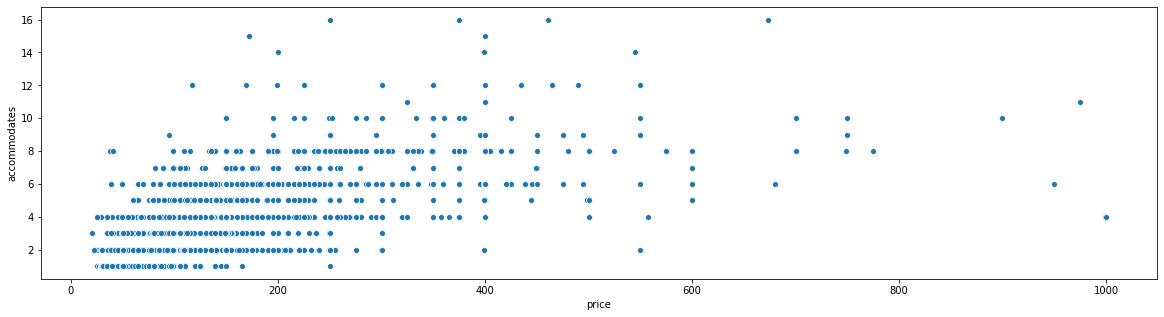

In [14]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='accommodates',data=listings)
plt.show()

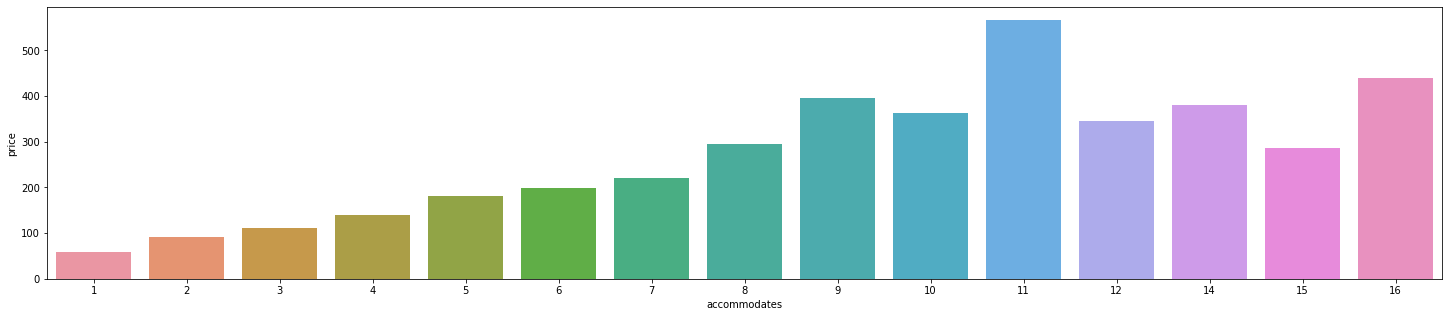

In [15]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("accommodates").mean()['price']).reset_index(), x = "accommodates" , y = "price" )
plt.show()

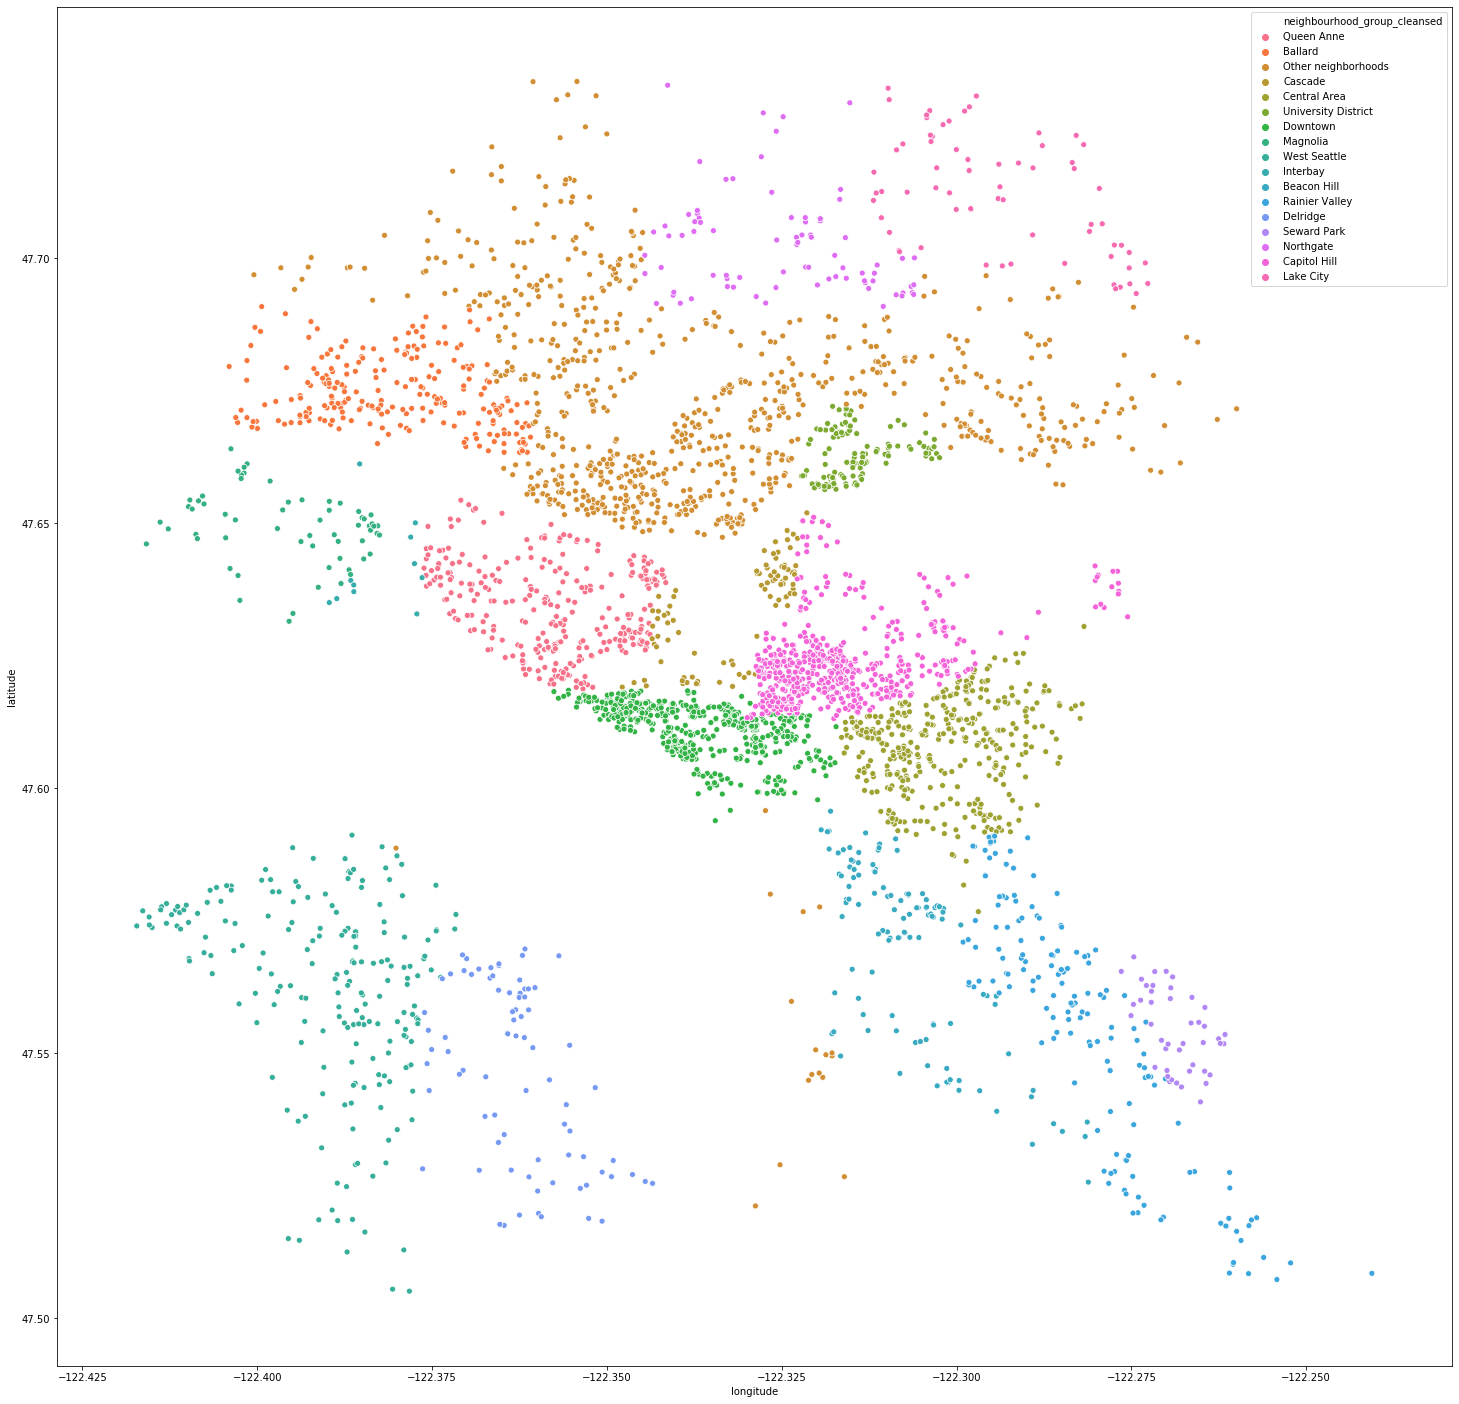

In [16]:
plt.figure(figsize=(25,25))
sb.scatterplot(listings["longitude"],listings["latitude"],hue=listings["neighbourhood_group_cleansed"])
plt.show()

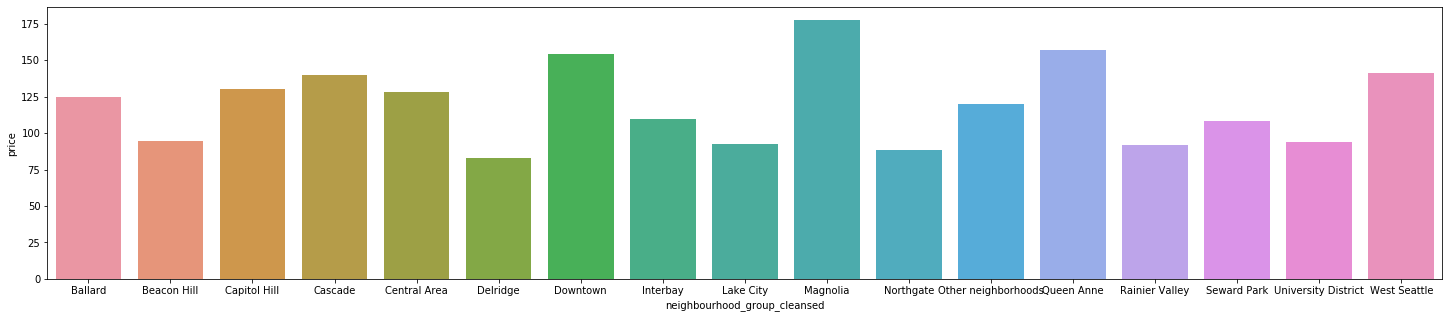

In [17]:
data_groupbyNeighbour = listings.groupby("neighbourhood_group_cleansed")
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(data_groupbyNeighbour.mean()["price"]).reset_index(), x = "neighbourhood_group_cleansed" , y = "price" )
plt.show()

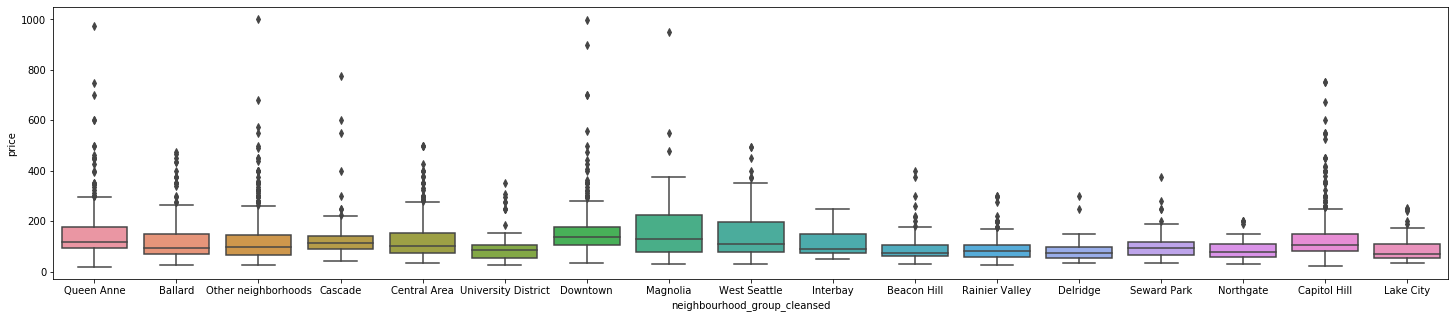

In [18]:
plt.figure(figsize=(25,5))
sb.boxplot(y="price",x ='neighbourhood_group_cleansed' ,data = listings)
plt.show()

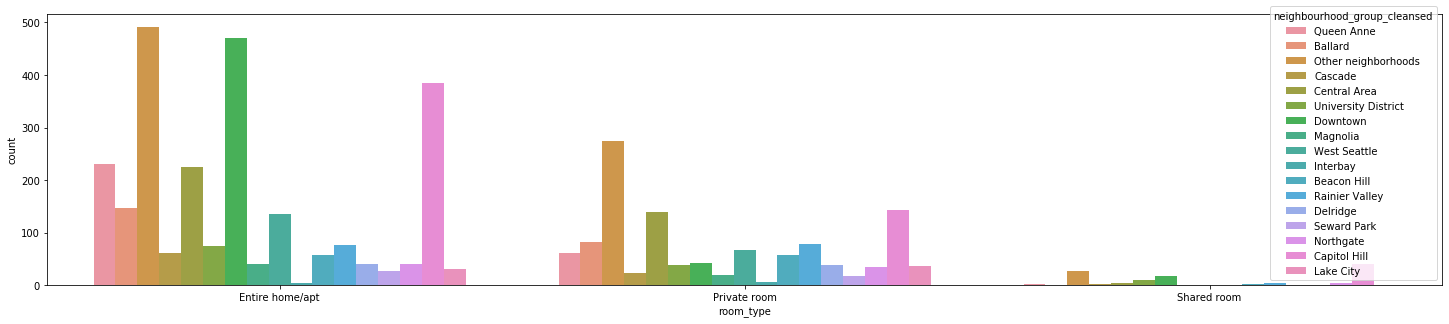

In [19]:
plt.figure(figsize=(25,5))
sb.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = listings)
plt.show()

<Figure size 1800x360 with 0 Axes>

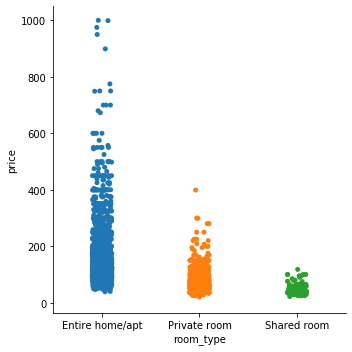

In [20]:
plt.figure(figsize=(25,5))
sb.catplot(x="room_type", y="price", data=listings);
plt.show()

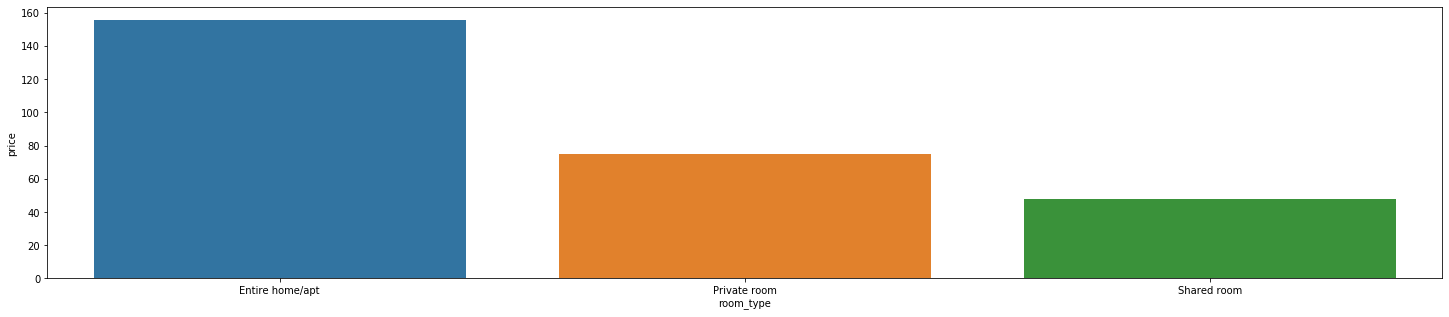

In [21]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("room_type").mean()['price']).reset_index(), x = "room_type" , y = "price" )
plt.show()

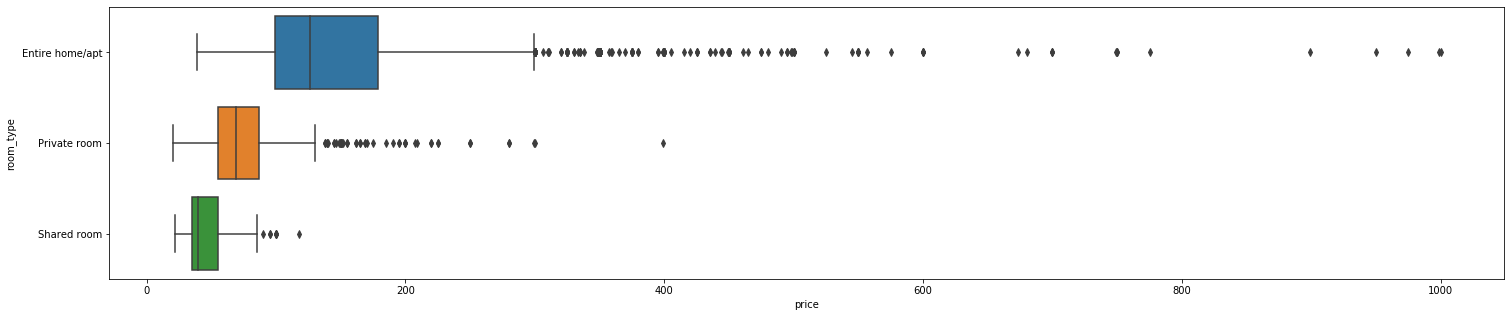

In [22]:
plt.figure(figsize=(25,5))
sb.boxplot(x="price",y ='room_type' ,data = listings)
plt.show()

In [135]:
arrowDF=listings.copy()

amenitieslist1=[]
for i in arrowDF.amenities.tolist():
    temp=i.replace('\"','')
    temp=temp.replace('{','')
    temp=temp.replace('}','')
    amenitieslist1.append(temp.split(','))   
amenitieslist2 = []
for i in amenitieslist1:
    for j in i:
        amenitieslist2.append(j)   
amenitiesCount = collections.Counter(amenitieslist2)
amenitiesCountDict = dict(amenitiesCount)

In [136]:
count_dict = {'amenities_available': list(amenitiesCountDict.keys()), 'num_amenities': list(amenitiesCountDict.values())}
amenitiesCountDF = pd.DataFrame.from_dict(count_dict)
amenitiesCountDF[amenitiesCountDF['amenities_available'] == ''] = np.nan
amenitiesCountDF.sort_values(by = 'num_amenities', ascending = False,inplace=True)
amenitiesCountDF.dropna()

,amenities_available,num_amenities
3,Wireless Internet,3667.0
5,Heating,3627.0
17,Kitchen,3423.0
7,Smoke Detector,3281.0
11,Essentials,3237.0
23,Dryer,2997.0
22,Washer,2992.0
2,Internet,2811.0
12,Shampoo,2670.0
0,TV,2574.0


In [137]:
clean_listings=arrowDF.copy()
for i in amenitiesCountDF['amenities_available']:
        if(type(i)!=str):
            break
        else:
            clean_listings[i]=arrowDF['amenities'].apply(lambda x:(returntruefalse(x,i)))

# Prediction of Price

In [70]:
## with amenities
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
ss =["bathrooms","bedrooms","neighbourhood_group_cleansed","room_type","host_response_rate" , "host_acceptance_rate" , "host_is_superhost" , "accommodates"]
# Extract Response and Predictors
y = np.log1p(listings['price'])
#x = listings[["bathrooms","bedrooms","neighbourhood_group_cleansed","room_type","host_response_rate" , "host_acceptance_rate" , "host_is_superhost" , "accommodates"]]

for i in amenitiesCountDF['amenities_available']:
    if(type(i)!=str):
            break
    else:
            ss.append(i)
x = pd.DataFrame(clean_listings[ss])

one_hot = pd.get_dummies(x['neighbourhood_group_cleansed'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['neighbourhood_group_cleansed'] , axis=1)

one_hot = pd.get_dummies(x['room_type'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['room_type'] , axis=1)
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [75]:
x

,bathrooms,bedrooms,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,Wireless Internet,Heating,Kitchen,Smoke Detector,Essentials,Dryer,Washer,Internet,Shampoo,TV,Carbon Monoxide Detector,Fire Extinguisher,Free Parking on Premises,Family/Kid Friendly,First Aid Kit,Cable TV,Indoor Fireplace,Pets live on this property,Hangers,Elevator in Building,Hair Dryer,Laptop Friendly Workspace,Iron,Safety Card,Air Conditioning,24-Hour Check-in,Buzzer/Wireless Intercom,Dog(s),Pets Allowed,Gym,Cat(s),Hot Tub,Wheelchair Accessible,Breakfast,Suitable for Events,Pool,Lock on Bedroom Door,Doorman,Smoking Allowed,Other pet(s),Washer / Dryer,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle,Entire home/apt,Private room,Shared room
0,1.0,1.0,96.000000,100.000000,0.0,4,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1.0,1.0,98.000000,100.000000,1.0,4,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,4.5,5.0,67.000000,100.000000,0.0,11,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1.0,0.0,94.886798,99.967159,0.0,3,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,2.0,3.0,100.000000,99.967159,0.0,6,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2.0,3.0,99.000000,100.000000,0.0,6,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3814,1.0,1.0,100.000000,100.000000,0.0,4,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3815,1.0,1.0,94.886798,99.967159,0.0,2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3816,1.0,0.0,100.000000,99.967159,0.0,2,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_test_pred = linreg.predict(x_test)

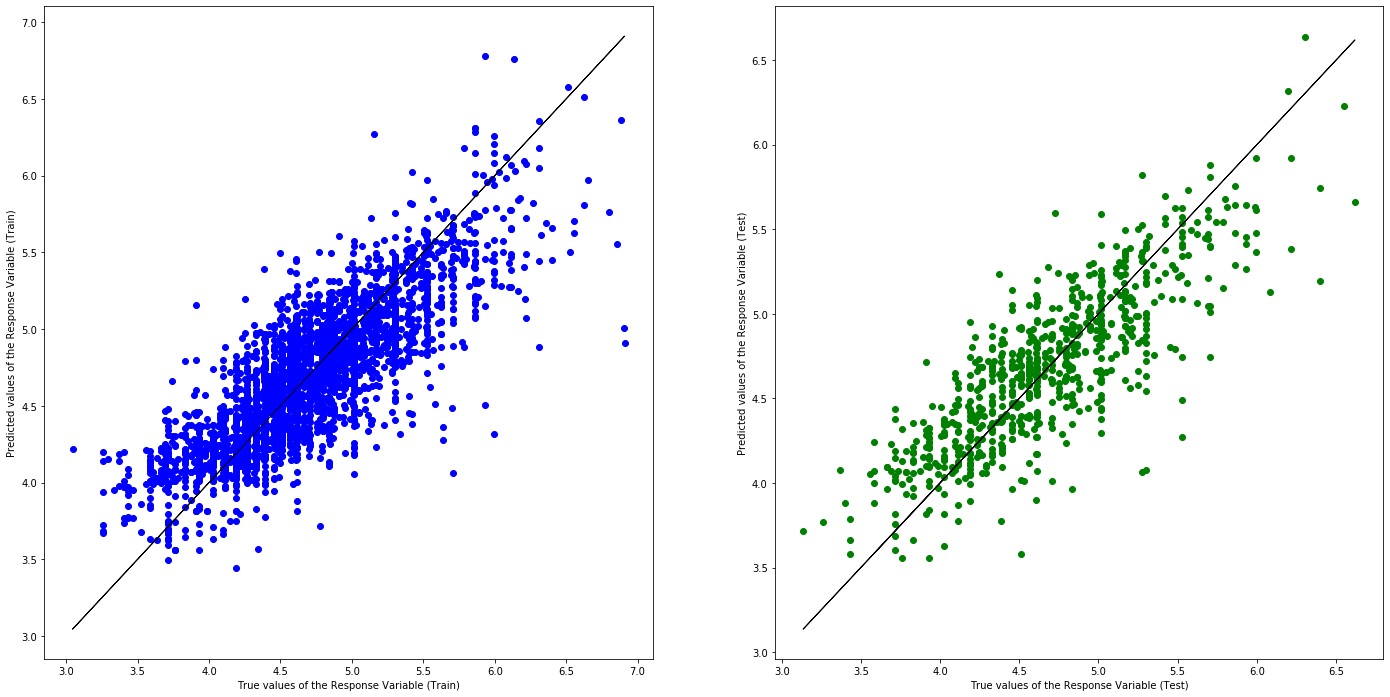

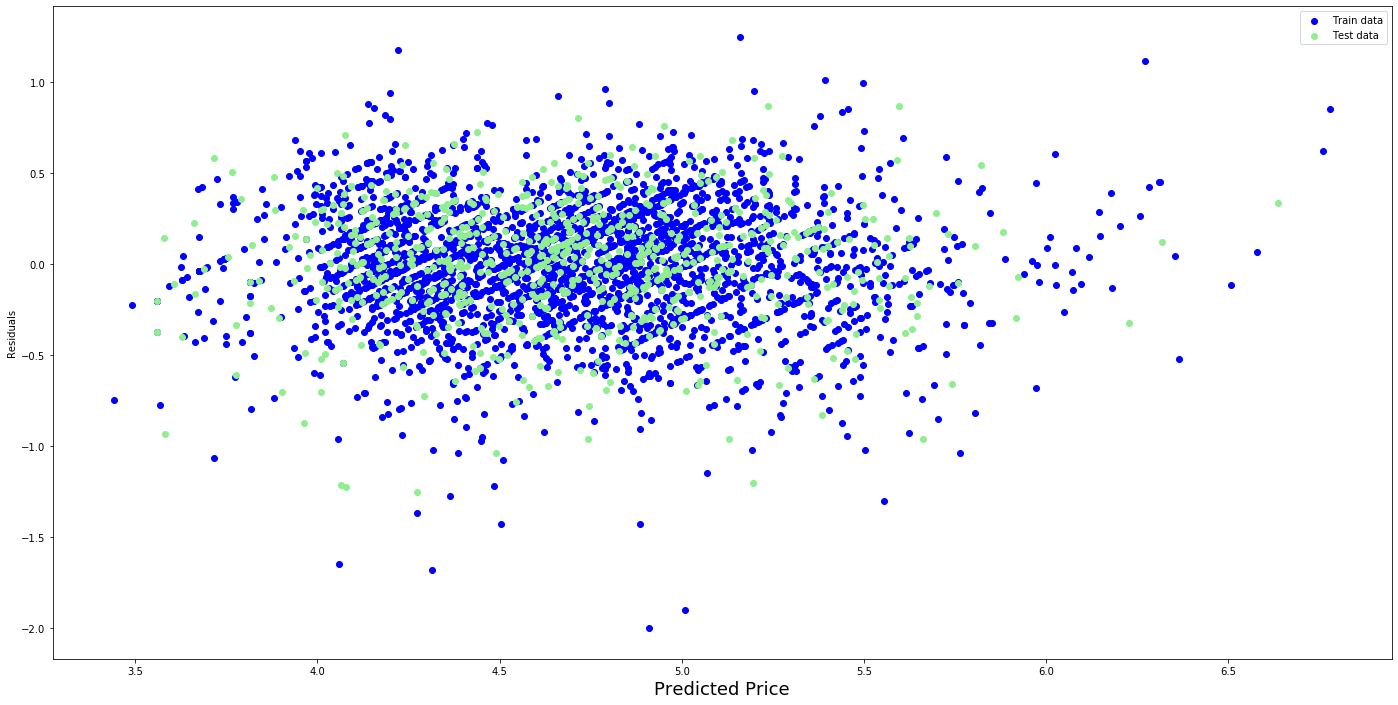

Explained Variance (R^2) on Train Set 	: 0.6703836353821213
Explained Variance (R^2) on Test Set 	: 0.6858525213173892


In [77]:
y_train_pred = linreg.predict(x_train)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price', fontsize=18)
plt.ylabel('Residuals')

plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))

# Random Forest Regression

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [79]:
rf= RandomForestRegressor(random_state=1, n_jobs=4, max_features='log2')

param_grid = dict(n_estimators=[3000,4000,5000],
                  max_depth=[None, 4],
                  min_samples_leaf=[1,2])

grid_rf =GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_rf.fit(x_train,y_train)


rf = grid_rf.best_estimator_

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)


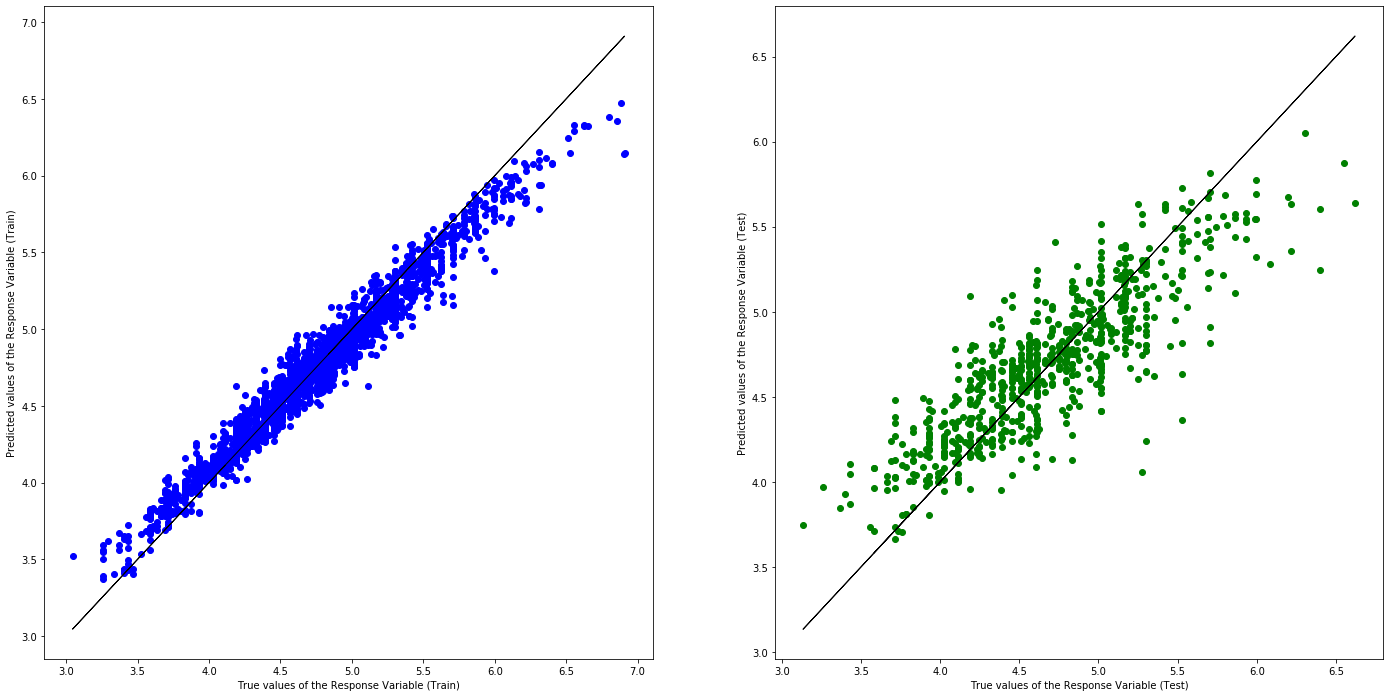

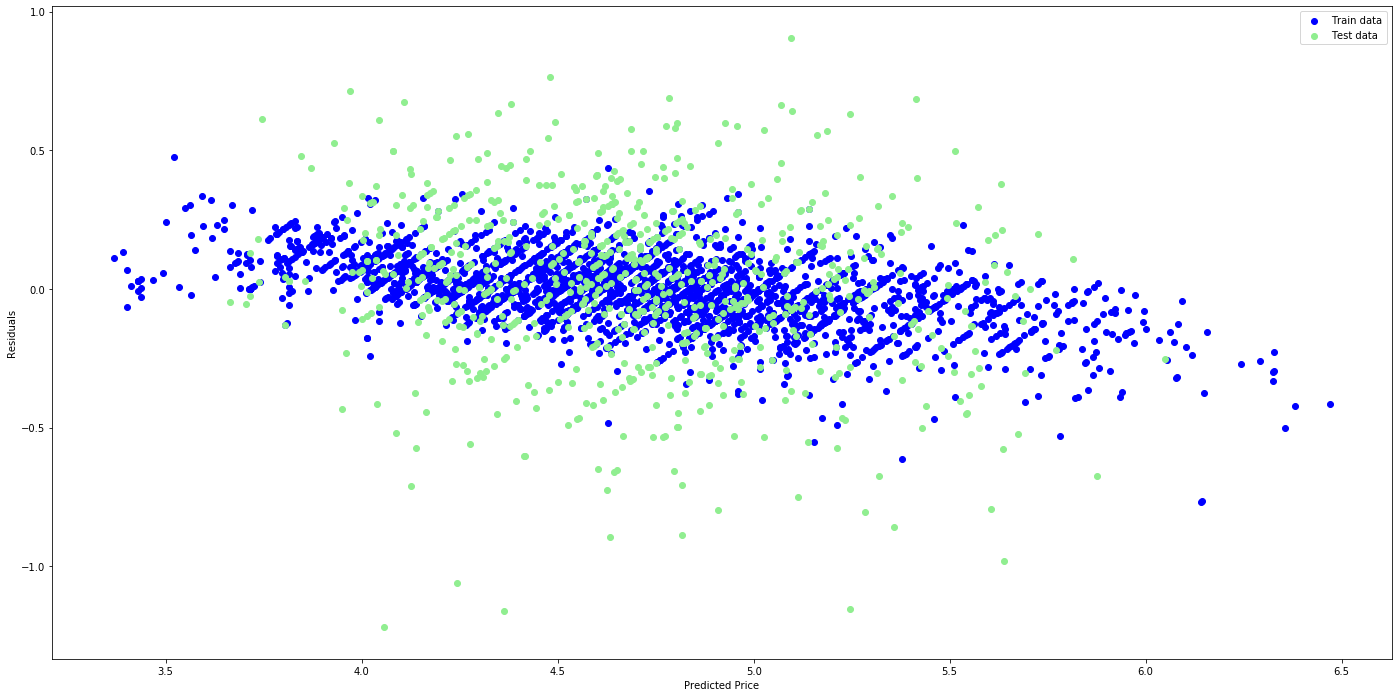

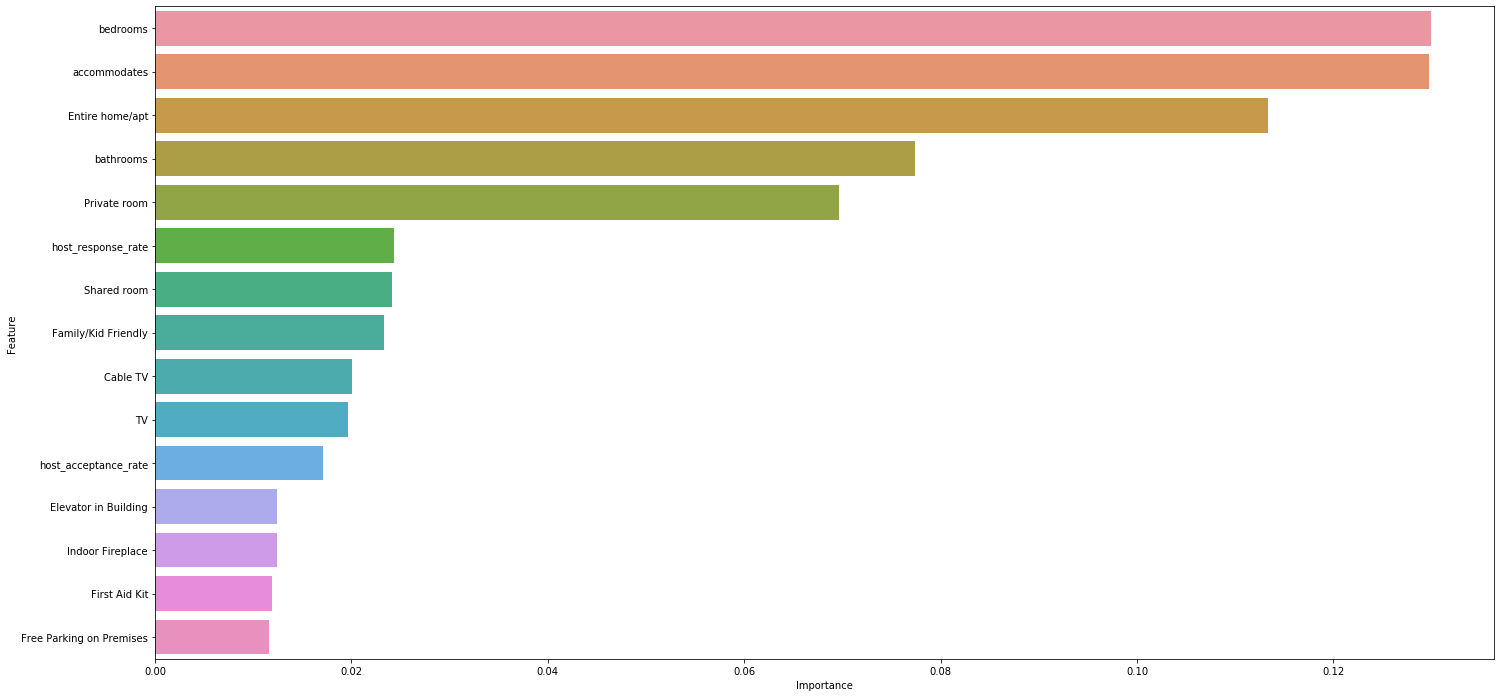

Explained Variance (R^2) on Train Set 	: 0.9565403231710435
Explained Variance (R^2) on Test Set 	: 0.7177443302111925


In [80]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':rf.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", rf.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", rf.score(x_test, y_test))

# Gradient Boosting Regressor


In [82]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error


gbr = GradientBoostingRegressor(min_samples_split=400,
                                min_samples_leaf=50,
                                subsample=0.8,
                                random_state=1,
                               learning_rate=0.01,
                               max_features='sqrt')
param_grid = dict(n_estimators=[6000,7000], max_depth=[2,4,6])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=2)

grid_gbr.fit(x_train,y_train)

gbr = grid_gbr.best_estimator_

y_test_pred = gbr.predict(x_test)
y_train_pred = gbr.predict(x_train)

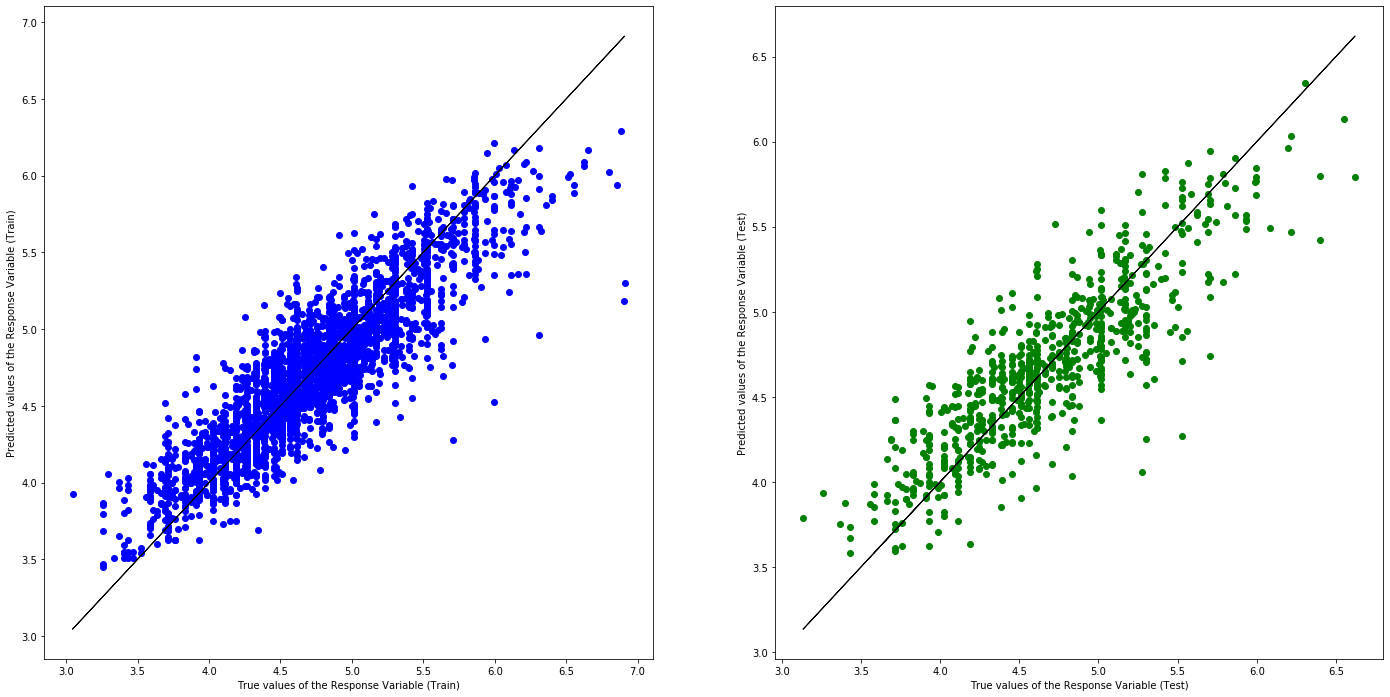

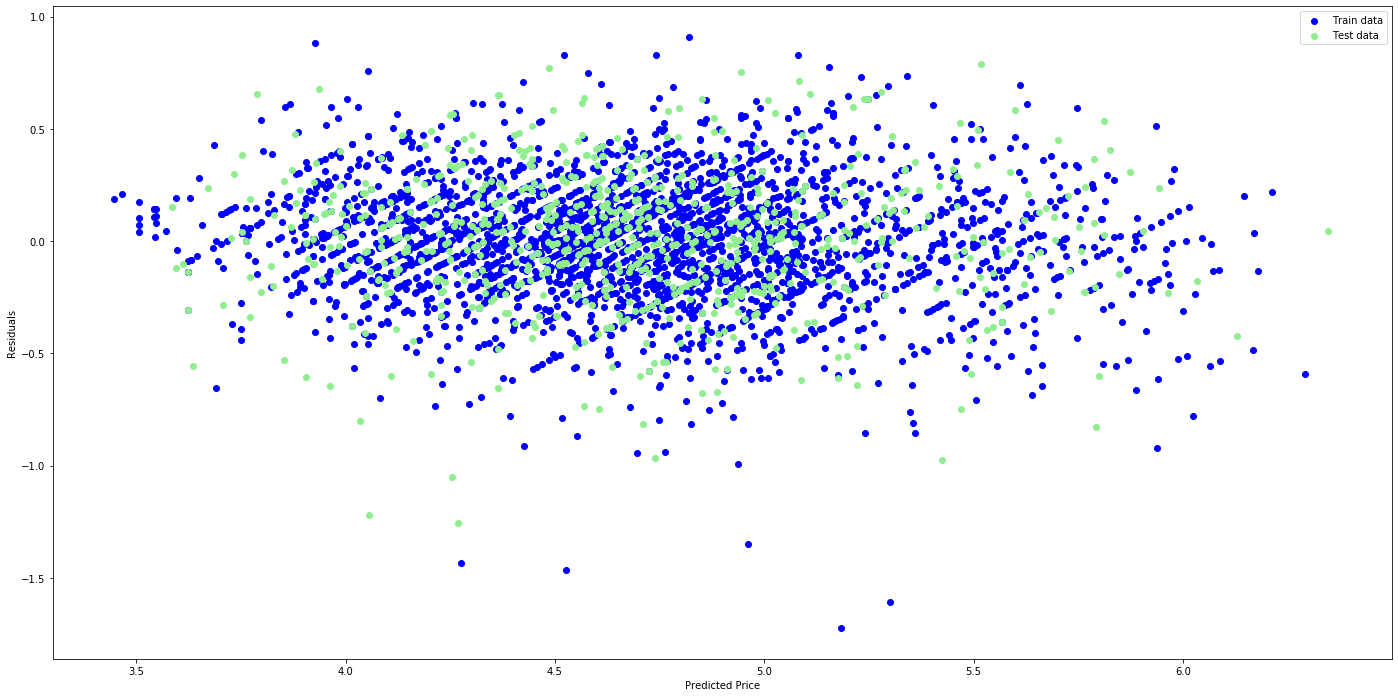

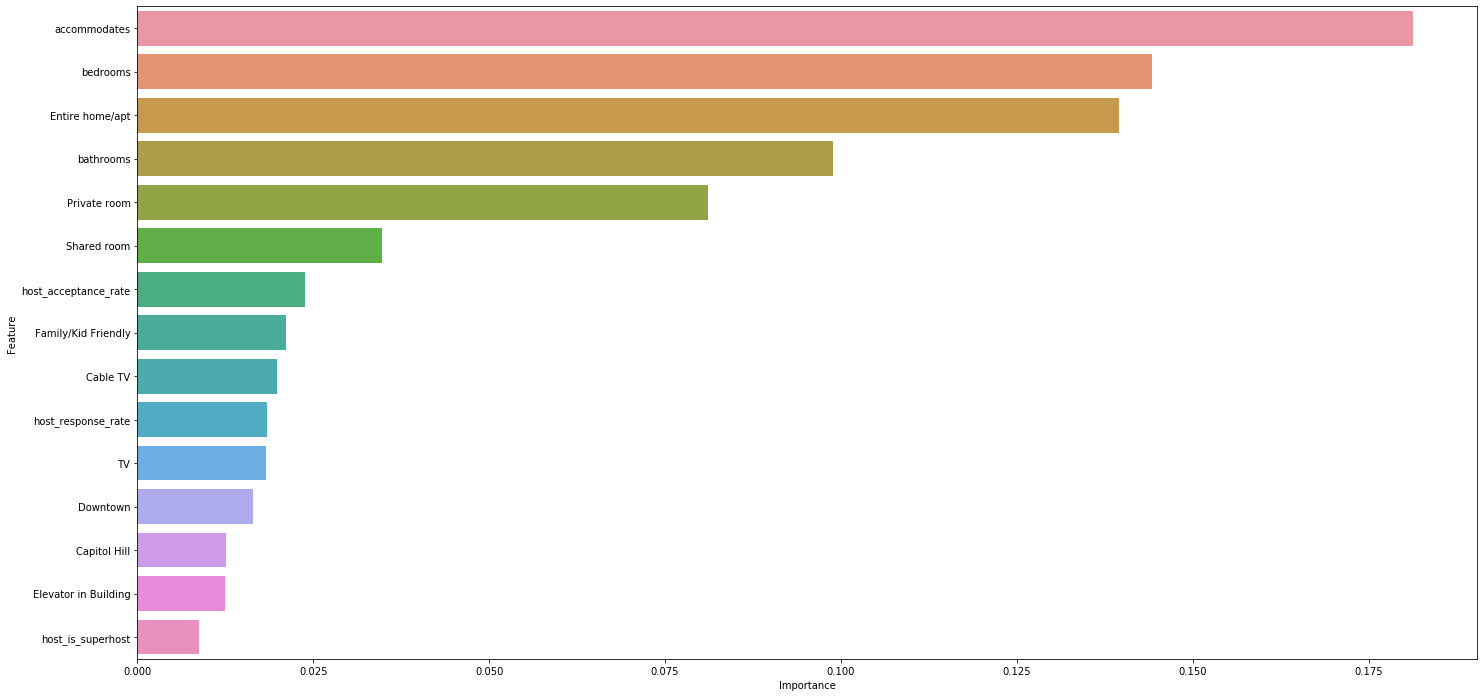

Explained Variance (R^2) on Train Set 	: 0.7905214797933594
Explained Variance (R^2) on Test Set 	: 0.7358210536298354


In [83]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':gbr.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", gbr.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", gbr.score(x_test, y_test))

In [84]:
import nltk
import string

data = pd.read_csv("data/reviews.csv")
comments = data['comments'].astype(str)

In [ ]:
CONTRACTION_MAP = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
}

In [ ]:
#Pre-Processing of Text 

#Expanding Contractions
import re
contractions_re = re.compile('(%s)' % '|'.join(CONTRACTION_MAP.keys()))
def expand_contractions(s, CONTRACTION_MAP=CONTRACTION_MAP):
    def replace(match):
         return CONTRACTION_MAP[match.group(0)]
    return contractions_re.sub(replace, s)

#Lower case
comments = comments.apply(lambda x: x.lower())

#Expanding Contractions
comments = comments.apply(expand_contractions)

#remove punctuation
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

#remove numbers
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.digits)))


#remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
comments = comments.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [ ]:
#Lemmazation with POS tagging

from nltk.corpus import wordnet
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV


lemma_function = WordNetLemmatizer()

def sentence_Lemmazation(sentence):
    tokens = word_tokenize(sentence)
    res_words = []
    for token, tag in pos_tag(tokens):
            res_words.append(lemma_function.lemmatize(token, tag_map[tag[0]]))
    return  " ".join(res_words)


comments = comments.apply(sentence_Lemmazation)  

In [ ]:
from wordcloud import WordCloud
# Display the generated image:
stop_words = ['seattle','downtown','bedroom','room',
              'kitchen','home','bed','house','apartment','bathroom','great','stay','place','us','would','host']
wordcloud = WordCloud(background_color="white",
                          width=800, height=800,
                          stopwords = stop_words,
                          collocations = False,
                         ).generate(' '.join(comments))
wordcloud.to_image()

In [ ]:
import collections

comments_count=[]
#getting name string from our list and using split function, later appending to list above
for sentence in comments:
    sentence_split = str(sentence).split()
    for word in sentence_split:
        comments_count.append(word)


comments_collections = collections.Counter(comments_count)
for x in stop_words:
    del comments_collections[x]
word_df = pd.DataFrame(comments_collections.most_common(20))
word_df.columns = ['word', 'counts']

In [ ]:
plt.figure(figsize=(25,6))
sb.barplot(x='word', y='counts', data=word_df)
plt.show()

## Calendar

In [87]:
calendar_data = calendar.copy().dropna()
dates = calendar_data['date']
price = calendar_data['price']

dateofyear = {date: 0 for date in set(dates)}

months = ['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016',
          'Oct 2016','Nov 2016', 'Dec 2016','Jan 2017']

for date in dates:
    dateofyear[date] += 1

customersmonthly = np.zeros(12)
    
for date in dateofyear:
    customersmonthly[int(date.split('-')[1]) - 1] += dateofyear[date]

customersmonthly = [int(customers) for customers in customersmonthly]

for i, month in enumerate(customersmonthly):
    print("Number of customers in {:10s} : {:10d}".format( months[i], month))
print("\n")
print("Mean of Monthly customers for 2016:      " + str(int(np.mean(customersmonthly))))



Number of customers in Jan 2016   :      64937
Number of customers in Feb 2016   :      73321
Number of customers in Mar 2016   :      83938
Number of customers in Apr 2016   :      76037
Number of customers in May 2016   :      79971
Number of customers in Jun 2016   :      77244
Number of customers in Jul 2016   :      74222
Number of customers in Aug 2016   :      76347
Number of customers in Sep 2016   :      77246
Number of customers in Oct 2016   :      82438
Number of customers in Nov 2016   :      81780
Number of customers in Dec 2016   :      87061


Mean of Monthly customers for 2016:      77878


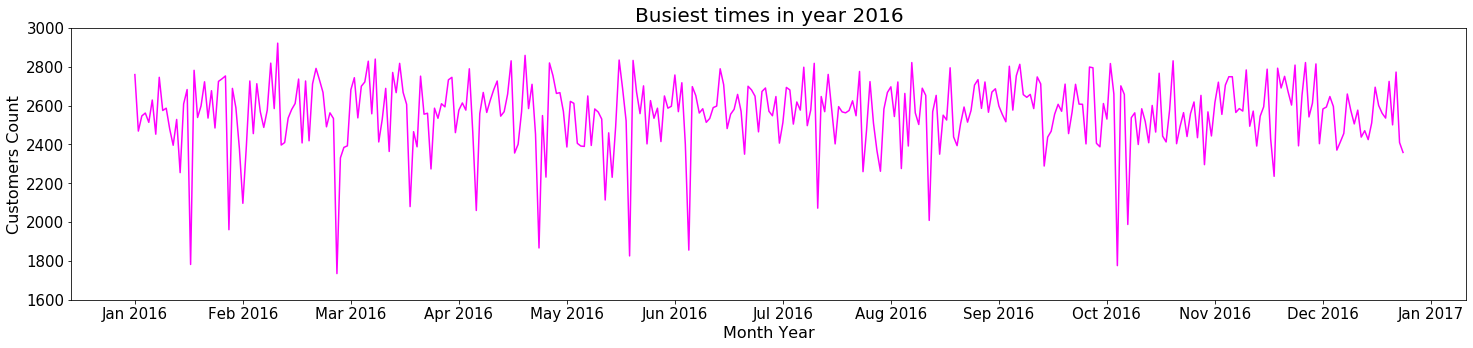

In [89]:
numberofyear = []

for i, date in enumerate(dateofyear.items()):
    numberofyear.append(date[1])

plot.figure(figsize=(25,5))
plot.plot(np.arange(1, len(numberofyear) + 1), numberofyear, color='magenta')
plot.title("Busiest times in year 2016", fontsize=20)
plot.xlabel("Month Year", fontsize=16)
plot.ylabel("Customers Count", fontsize=16)
plot.yticks(np.arange(1600, 3100, 200), fontsize=15)
plot.xticks(np.arange(1, 395, 31), months, fontsize=15)
plot.show()



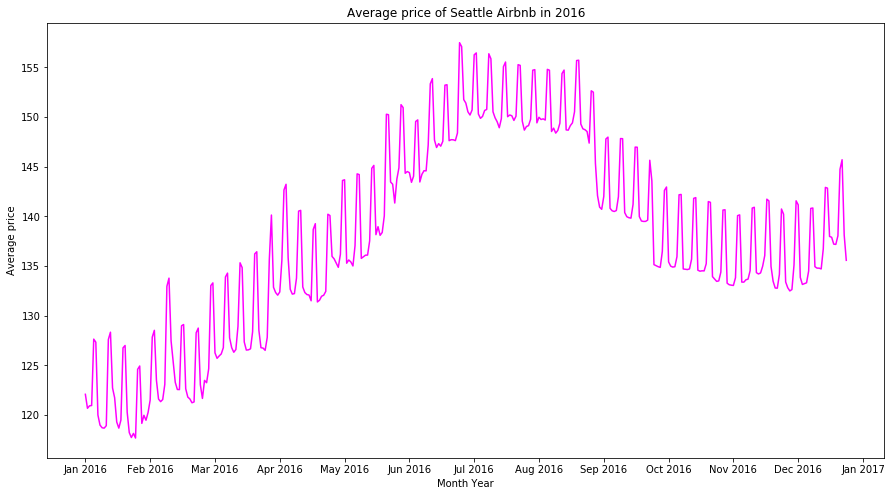

In [91]:
calendar_data['price']=calendar_data['price'].str.replace('$','')
calendar_data['price']=calendar_data['price'].str.replace(',','')
calendar_data['price']=calendar_data['price'].astype(float)
calendar_data=calendar_data.groupby('date')['price'].mean().reset_index()

plot.figure(figsize=(15,8))
plot.plot(np.arange(1, len(numberofyear) + 1),calendar_data['price'], color='magenta')
plot.title('Average price of Seattle Airbnb in 2016')
plot.xlabel('Month Year')
plot.ylabel('Average price')
plot.xticks(np.arange(1, 395, 31), months, fontsize=10)
plot.show()

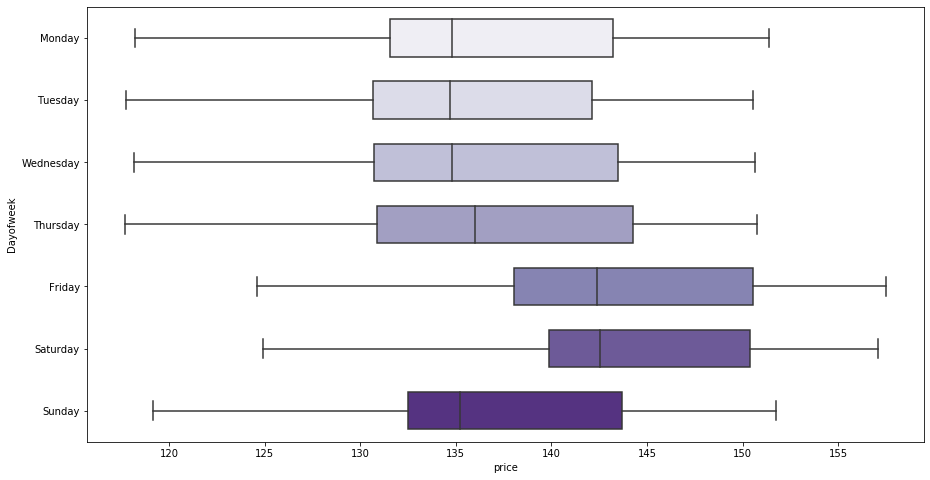

In [94]:
calendar_data['date']=pd.to_datetime(calendar_data['date'])
calendar_data['Dayofweek']=calendar_data['date'].dt.day_name()
plot.figure(figsize=(15, 8))
sns.boxplot(y = 'Dayofweek',  x = 'price', data = calendar_data, palette="Purples", width=0.6)
plot.show()

Polynomial Ridge Regression: 5 degree
Coefficients and Intercept of the Linear Regression: 

Y = [0.0, 29852.32, -8187.4, 955.38, -48.58, 0.89]X + 41831.41


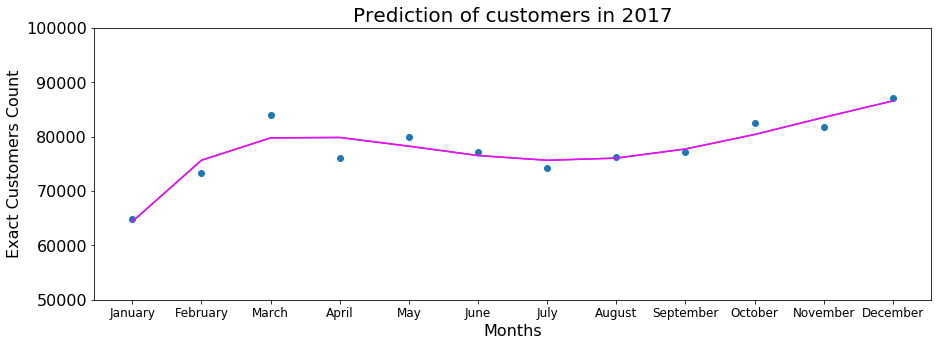

In [97]:
linreg = LinearRegression()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
         'October', 'November', 'December']
y = np.array(customersmonthly)
X = np.array(np.arange(1, 13))
X = X[:, None]
y = y[:, None]

poly= PolynomialFeatures(5)
xpoly = poly.fit_transform(X)
rr = LinearRegression()
rr.fit(xpoly, y)

y_poly_pred = rr.predict(xpoly)

print("Polynomial Ridge Regression: 5 degree")
print("Coefficients and Intercept of the Linear Regression: \n")
print("Y = " + str([round(x,2) for x in rr.coef_[0]]) + "X + "+ str(round(rr.intercept_[0], 2)))

plot.figure(figsize=(15,5))
plot.scatter(X, y)
plot.plot(np.arange(1, len(y_poly_pred) + 1), y_poly_pred)
plot.plot(X, y_poly_pred, color="magenta")
plot.title("Prediction of customers in 2017", fontsize=20)
plot.xlabel("Months", fontsize=16)
plot.ylabel("Exact Customers Count", fontsize=16)
plot.yticks(np.arange(50000, 110000, 10000), fontsize=16)
plot.xticks(np.arange(1, 13), months, fontsize=12)
plot.show()

## Ratings

Text(0.5, 0, 'Review Ratings')

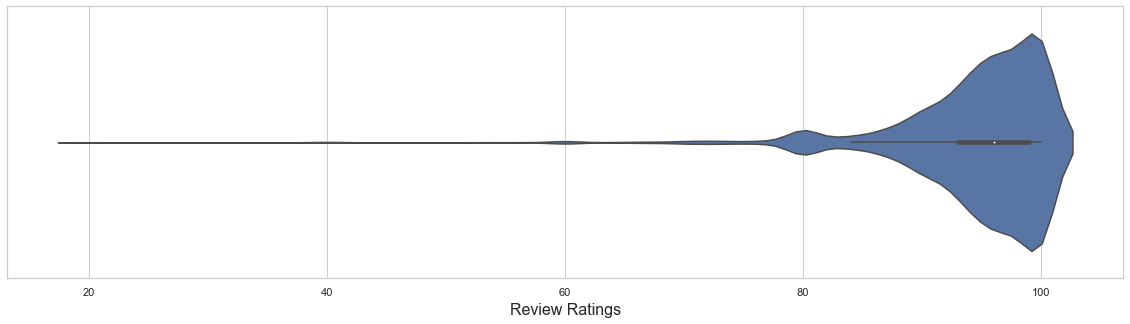

In [118]:
sns.set(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(20, 5))
ax = sns.violinplot(ax=ax,x=listings["review_scores_rating"])
plot.xlabel("Review Ratings", fontsize=16)

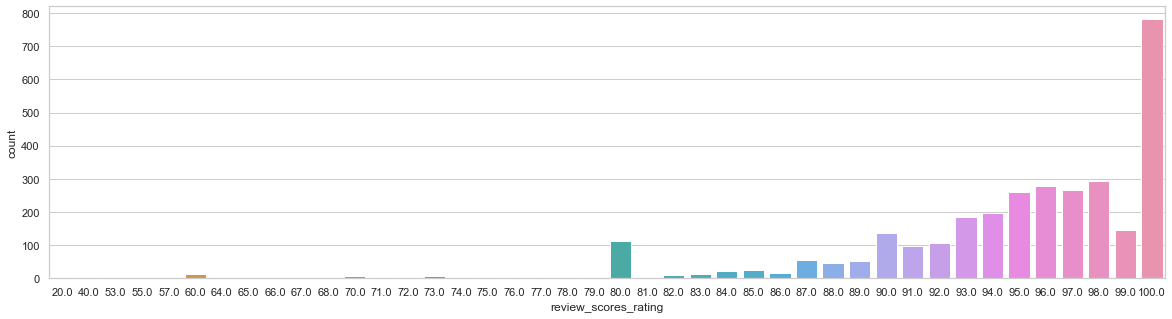

In [119]:
fig, x2c = pyplot.subplots(figsize=(20, 5))
x2c = sns.countplot(ax=x2c,x=listings["review_scores_rating"])

In [120]:
listings=listings.sort_values(by=['neighbourhood_cleansed'])
neighNames=[]
neighRatings=[]
rating=0
counter=0
step=0
neigh=listings["neighbourhood_cleansed"]
ratings=listings["review_scores_rating"]
for x,y in zip(neigh,ratings):
    if x in neighNames:
        rating+=y
        counter=counter+1
        
    else:
        if(step==0):
            neighNames.append(x)
            rating+=y
            counter=counter+1
            
        else:
            neighRatings.append(rating/counter)
            neighNames.append(x)
            rating=y
            counter=1
            
else:
    neighRatings.append(rating/counter)

In [121]:
listingsRating=cleanRatings(listings)
listingsRating

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,amenities_length
134,2.0,1.00,1.0,1.0,Adams,House,Private room,2,1.0,1.0,1.0,Real Bed,57.0,550.0,2000.0,100.0,15.0,0,0.0,2,28,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,moderate,239
133,1.0,0.90,1.0,1.0,Adams,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,75.0,540.0,1900.0,250.0,50.0,2,20.0,2,14,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,moderate,92
117,1.0,1.00,1.0,0.0,Adams,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,80.0,665.0,0.0,0.0,0.0,2,0.0,1,1125,92.0,9.0,8.0,9.0,10.0,10.0,10.0,0.0,flexible,0
119,2.0,1.00,0.0,1.0,Adams,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,150.0,0.0,0.0,100.0,90.0,2,10.0,4,1125,94.0,10.0,9.0,10.0,10.0,10.0,9.0,0.0,moderate,181
101,2.0,0.90,1.0,0.0,Adams,House,Private room,2,1.0,1.0,1.0,Real Bed,65.0,555.0,1850.0,0.0,0.0,2,15.0,1,1125,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,moderate,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1.0,1.00,1.0,0.0,Yesler Terrace,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,89.0,600.0,2600.0,0.0,20.0,2,0.0,1,1125,100.0,10.0,8.0,10.0,10.0,9.0,10.0,0.0,strict,327
1678,1.0,0.90,1.0,0.0,Yesler Terrace,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,65.0,0.0,0.0,0.0,0.0,1,0.0,1,4,93.0,10.0,9.0,10.0,10.0,10.0,10.0,0.0,flexible,158
1676,1.0,0.67,1.0,0.0,Yesler Terrace,Apartment,Entire home/apt,2,1.0,0.0,1.0,Futon,100.0,0.0,0.0,0.0,0.0,1,0.0,1,1125,97.0,10.0,9.0,10.0,10.0,9.0,10.0,0.0,moderate,216
1681,1.0,1.00,1.0,0.0,Yesler Terrace,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,169.0,1100.0,4800.0,0.0,20.0,4,30.0,1,1125,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,strict,308


In [122]:
listingsSS=listingsRating.loc[:,['neighbourhood_cleansed','review_scores_rating']]
listingsG=listingsSS.groupby('neighbourhood_cleansed',as_index=False).mean().sort_values(by=['review_scores_rating'])
listingsLastTen=listingsG.nsmallest(10,['review_scores_rating'])
listingsLastTen

,neighbourhood_cleansed,review_scores_rating
72,South Park,88.000000
76,University District,88.437500
59,Pinehurst,89.250000
69,South Beacon Hill,89.500000
78,View Ridge,90.166667
71,South Lake Union,90.789474
63,Ravenna,91.240741
31,Holly Park,92.000000
36,Lawton Park,92.095238
17,Eastlake,92.222222


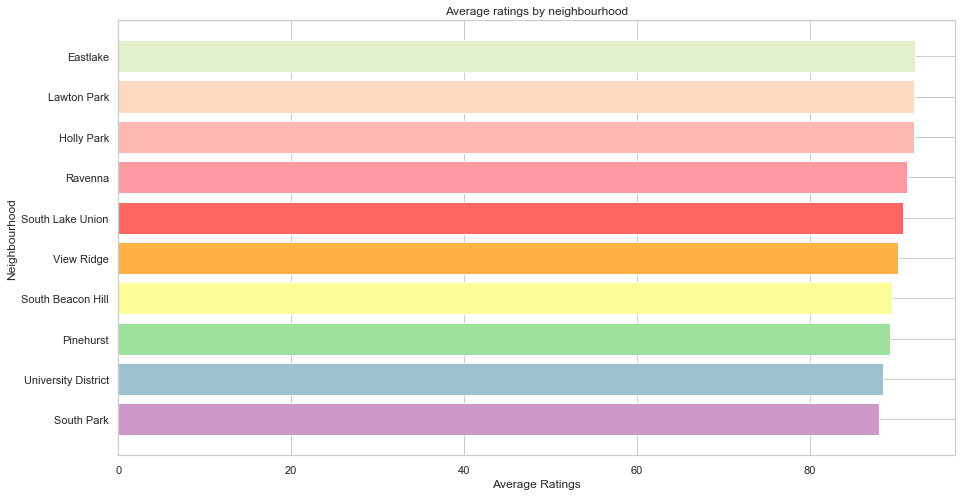

In [123]:
plot.figure(figsize=(15,8))
plot.barh(listingsLastTen['neighbourhood_cleansed'],listingsLastTen['review_scores_rating'], color=['#cc99c9','#9ec1cf',  '#9ee09e', '#fdfd97','#feb144','#ff6663','#FF9AA2','#FFB7B2','#FFDAC1','#E2F0CB'])
plot.title('Average ratings by neighbourhood')
plot.xlabel('Average Ratings')
plot.ylabel('Neighbourhood')
plot.show()

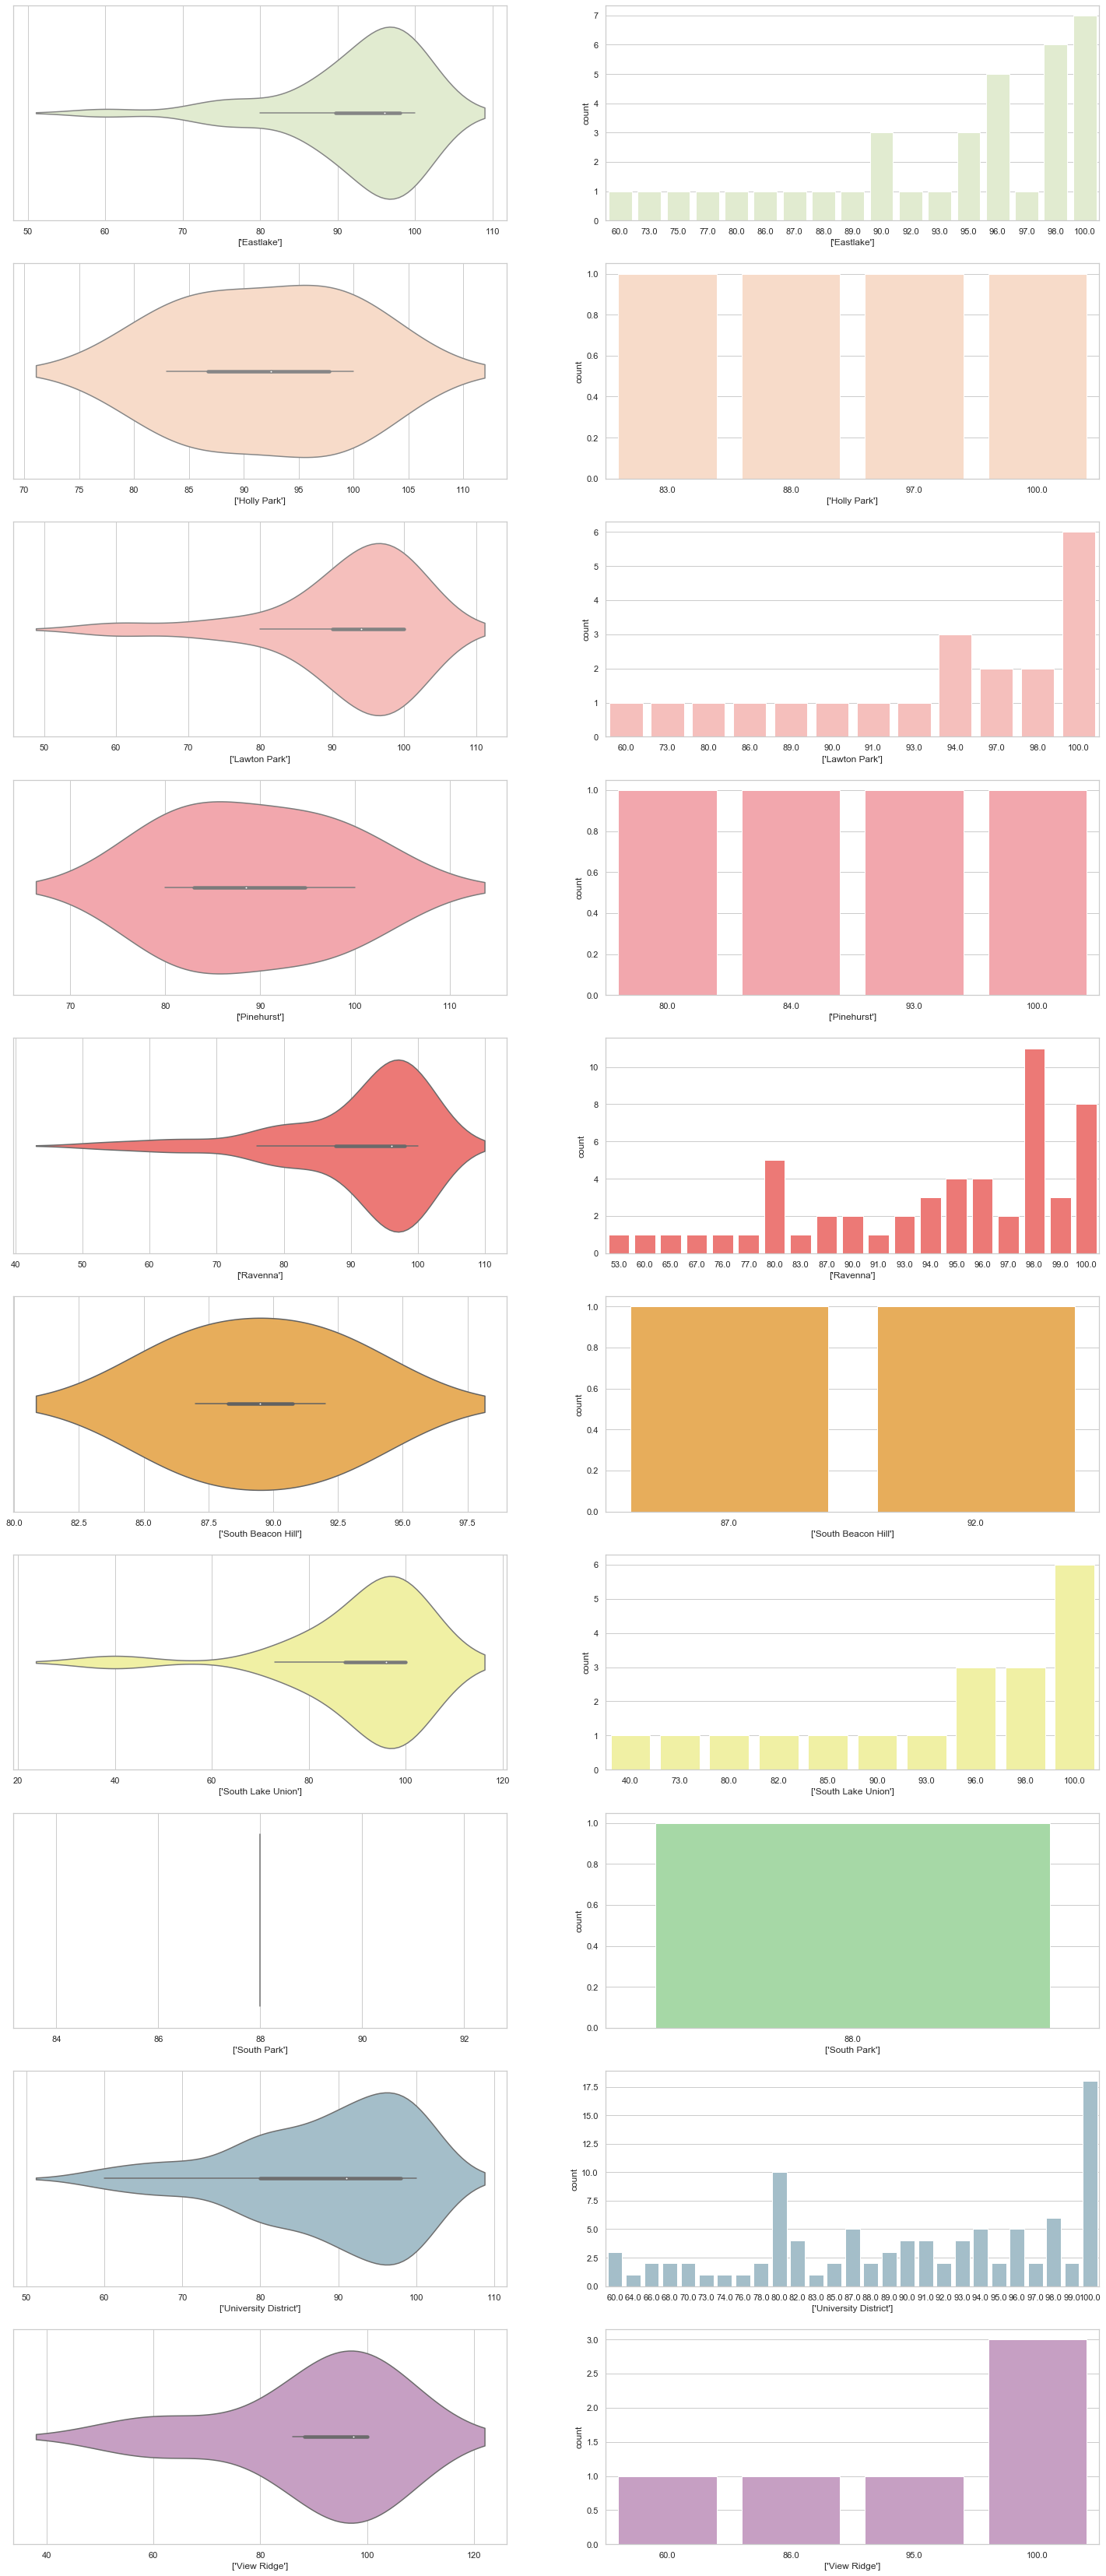

In [124]:
import warnings
warnings.filterwarnings('ignore')
colors=['#cc99c9','#9ec1cf','#9ee09e', '#fdfd97','#feb144','#ff6663','#FF9AA2','#FFB7B2','#FFDAC1','#E2F0CB']
colors=np.flip(colors)
listings2= listings[['neighbourhood_cleansed','review_scores_rating']].dropna()
f, axes = plot.subplots(10, 2, figsize=(25,60))
counter=0
for var in range(len(neighNames)):
    if(listingsLastTen["neighbourhood_cleansed"].str.contains(neighNames[var]).any()):
        df1=(listings2[listings['neighbourhood_cleansed'] == neighNames[var] ])
        ssb=sns.violinplot(ax=axes[counter,0],x=df1['review_scores_rating'],color=colors[counter])
        ssb.set(xlabel=[neighNames[var]])
        ssb2=sns.countplot(ax=axes[counter,1],x=df1['review_scores_rating'],color=colors[counter])
        ssb2.set(xlabel=[neighNames[var]])
        counter+=1

    

In [125]:
from IPython.display import IFrame
IFrame(src='data/Calendar.html', width=1080, height=800)

### As from above we can see 'University district' have more ratings below the norm of 90
### What are some ways hosts can do to improve that?

Text(0.5, 0, 'Other neighbourhoods')

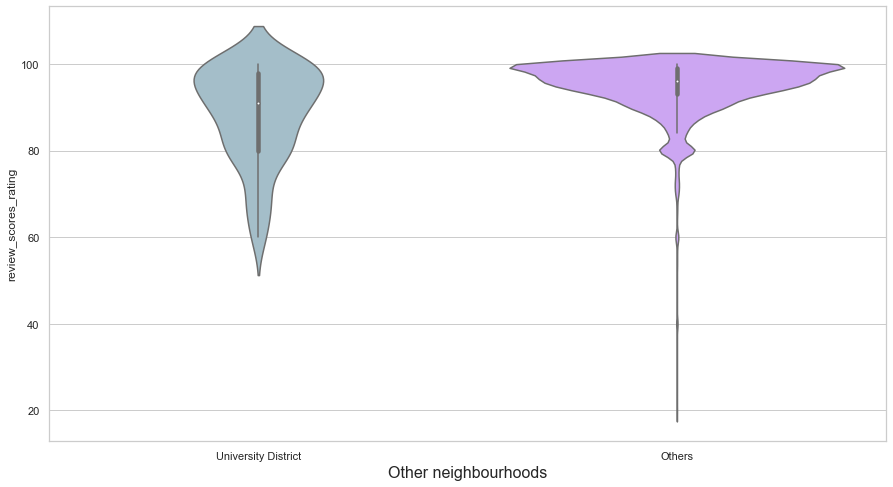

In [126]:
import seaborn as sns
from matplotlib import pyplot
sns.set(style="whitegrid")

fig, ax = plot.subplots(figsize=(15,8))
    
df2=listings[["review_scores_rating",'neighbourhood_cleansed']].dropna()
df2=(df2[df2['neighbourhood_cleansed'] == "University District" ])

df3=listings[["review_scores_rating",'neighbourhood_cleansed']].dropna()
df3=(df3[df3['neighbourhood_cleansed'] != "University District" ])
df3['neighbourhood_cleansed']="Others"
frames = [df2, df3]
df4=pd.concat(frames)
ax = sns.violinplot(ax=ax,x=df4["neighbourhood_cleansed"],y=df4['review_scores_rating'],palette=['#9ec1cf', '#CC99FF'])
plot.xlabel("Other neighbourhoods", fontsize=16)



Text(0.5, 0, 'Other neighbourhoods')

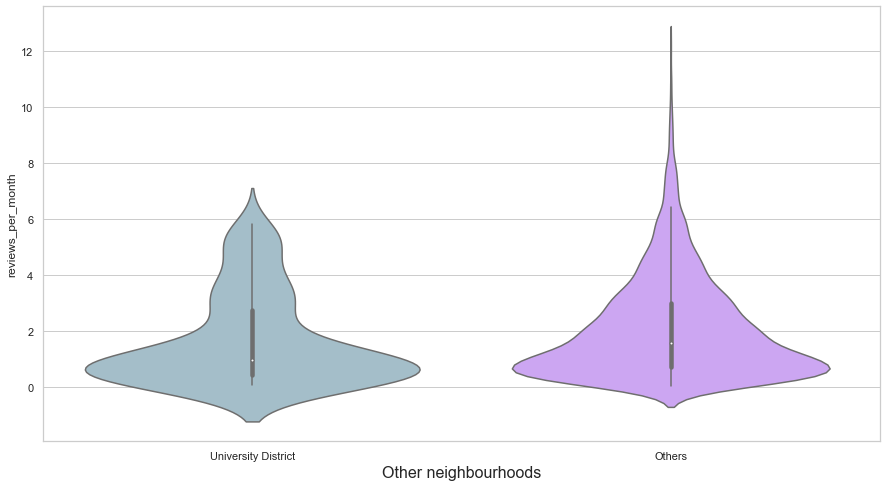

In [127]:
import seaborn as sns
from matplotlib import pyplot
sns.set(style="whitegrid")

fig, ax = plot.subplots(figsize=(15,8))
    
df2=listings[["reviews_per_month",'neighbourhood_cleansed']].dropna()
df2=(df2[df2['neighbourhood_cleansed'] == "University District" ])

df3=listings[["reviews_per_month",'neighbourhood_cleansed']].dropna()
df3=(df3[df3['neighbourhood_cleansed'] != "University District" ])
df3['neighbourhood_cleansed']="Others"
frames = [df2, df3]
df4=pd.concat(frames)
ax = sns.violinplot(ax=ax,x=df4["neighbourhood_cleansed"],y=df4['reviews_per_month'],palette=['#9ec1cf', '#CC99FF'])
plot.xlabel("Other neighbourhoods", fontsize=16)



## Predict rating with host response time

[Text(0.5, 0, "['Seattle Host Response Counts']")]

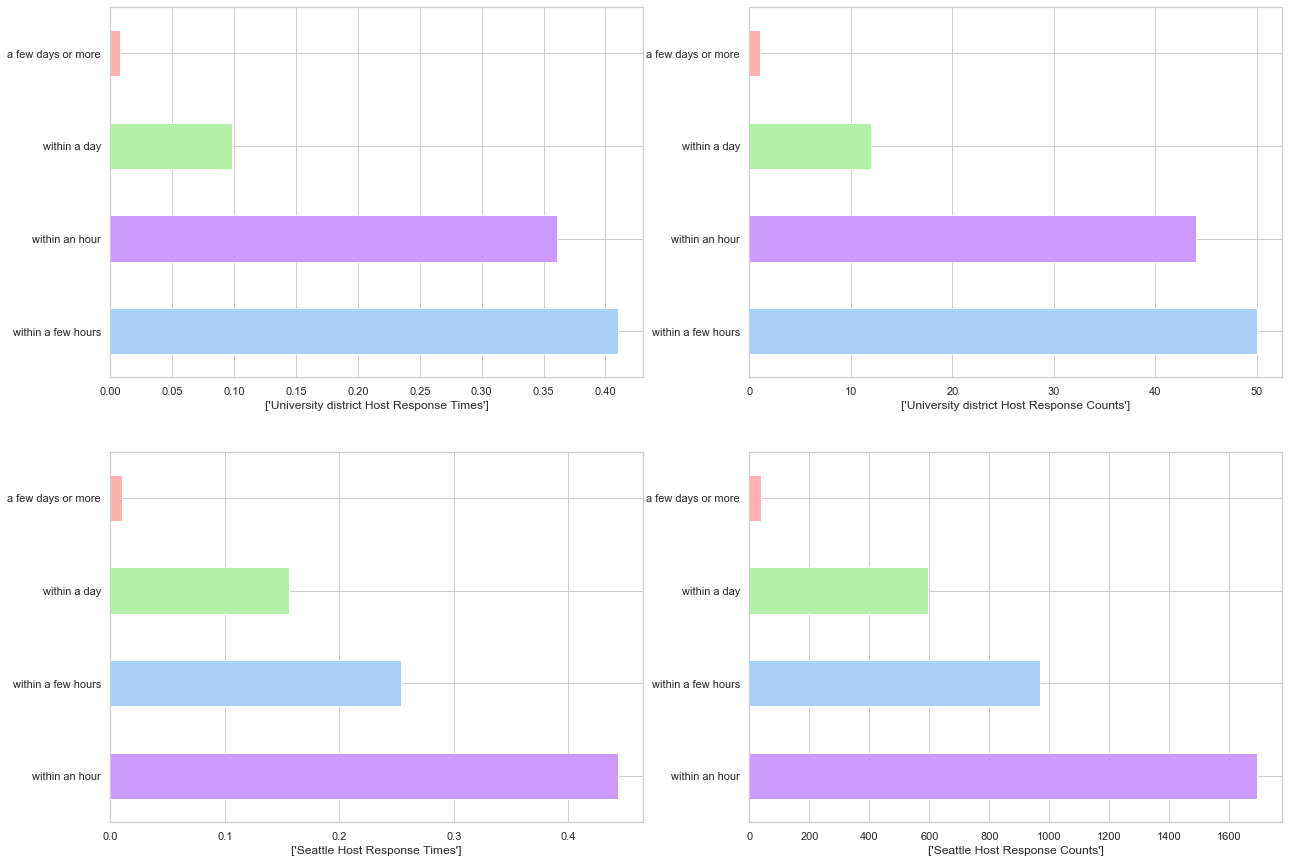

In [128]:
UniDistrict_DF=listings[listings['neighbourhood_cleansed']== "University District"]
f, axes = plot.subplots(2, 2, figsize=(21,15))

ssbv=((UniDistrict_DF['host_response_time'].value_counts())/UniDistrict_DF.shape[0]).plot(ax=axes[0,0],kind="barh", color=['#A9D1F7','#CC99FF',  '#B4F0A7', '#FFB1B0'])
ssbv.set(xlabel=["University district Host Response Times"])

ssbv2=((UniDistrict_DF['host_response_time'].value_counts())).plot(ax=axes[0,1],kind="barh", color=['#A9D1F7','#CC99FF',  '#B4F0A7', '#FFB1B0'])
ssbv2.set(xlabel=["University district Host Response Counts"])

host_response_vals = listings['host_response_time'].value_counts()
ssbv3=(host_response_vals/listings.shape[0]).plot(ax=axes[1,0],kind="barh", color=['#CC99FF', '#A9D1F7', '#B4F0A7', '#FFB1B0']);
ssbv3.set(xlabel=["Seattle Host Response Times"])

ssbv4=(host_response_vals).plot(ax=axes[1,1],kind="barh", color=['#CC99FF', '#A9D1F7', '#B4F0A7', '#FFB1B0']);
ssbv4.set(xlabel=["Seattle Host Response Counts"])

## Predict Ratings

In [144]:
#arrowDF=UniDistrict_DF.copy()
arrowDF=listings.copy()

amenitieslist1=[]
for i in arrowDF.amenities.tolist():
    temp=i.replace('\"','')
    temp=temp.replace('{','')
    temp=temp.replace('}','')
    amenitieslist1.append(temp.split(','))   
amenitieslist2 = []
for i in amenitieslist1:
    for j in i:
        amenitieslist2.append(j)   
amenitiesCount = collections.Counter(amenitieslist2)
amenitiesCountDict = dict(amenitiesCount)

In [145]:
count_dict = {'amenities_available': list(amenitiesCountDict.keys()), 'num_amenities': list(amenitiesCountDict.values())}
amenitiesCountDF = pd.DataFrame.from_dict(count_dict)
amenitiesCountDF[amenitiesCountDF['amenities_available'] == ''] = np.nan
amenitiesCountDF.sort_values(by = 'num_amenities', ascending = False,inplace=True)
amenitiesCountDF.dropna()
amenitiesCountDF

,amenities_available,num_amenities
3,Wireless Internet,3667.0
5,Heating,3627.0
17,Kitchen,3423.0
7,Smoke Detector,3281.0
11,Essentials,3237.0
23,Dryer,2997.0
22,Washer,2992.0
2,Internet,2811.0
12,Shampoo,2670.0
0,TV,2574.0


In [146]:
clean_listings=arrowDF.copy()
for i in amenitiesCountDF['amenities_available']:
        if(type(i)!=str):
            break
        else:
            clean_listings[i]=arrowDF['amenities'].apply(lambda x:(test(x,i)))
clean_listings2=clean_listings.copy()       

In [147]:
#clean_listings['instant_bookable'] = clean_listings['instant_bookable'].fillna('f')
clean_listings = clean_listings[clean_listings['review_scores_rating'].notna()]
clean_listings['host_verified_facebook']=clean_listings['host_verifications'].str.contains("facebook")
clean_listings['host_is_superhost']=clean_listings['host_is_superhost'].fillna(0)
clean_listings.loc[clean_listings['host_is_superhost']=='f','host_is_superhost']=0
clean_listings.loc[clean_listings['host_is_superhost']=='t','host_is_superhost']=1
clean_listings.loc[clean_listings['host_verified_facebook']==True,'host_verified_facebook']=1
clean_listings.loc[clean_listings['host_verified_facebook']==False,'host_verified_facebook']=0
ss =['host_verified_facebook','host_is_superhost']

"""for i in amenitiesCountDF['amenities_available']:
    if(type(i)!=str):
            break
    else:
            ss.append(i)"""
            
responseSet = pd.DataFrame(clean_listings['review_scores_rating'])

predictorSet = pd.DataFrame(clean_listings[ss])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(predictorSet, responseSet, test_size = 0.20)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)


Train Set : (2536, 1) (2536, 2)
Test Set  : (635, 1) (635, 2)


# Linear Regression

In [149]:
"""reg = LinearRegression().fit(X_train,y_train)
coefs=pd.DataFrame(reg.coef_,index=X_train.columns)
coefs.columns=['Coeff']
coefs.sort_values(by=['Coeff'],ascending=False).head(5)"""
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_test_pred = linreg.predict(X_test)
y_test_pred

array([[97.50122648],
       [93.48715543],
       [93.48715543],
       [97.50122648],
       [93.48715543],
       [97.50122648],
       [97.33550508],
       [93.65287682],
       [93.65287682],
       [93.65287682],
       [93.65287682],
       [93.48715543],
       [97.33550508],
       [97.33550508],
       [93.65287682],
       [93.65287682],
       [93.65287682],
       [93.48715543],
       [93.48715543],
       [97.33550508],
       [93.48715543],
       [93.65287682],
       [97.50122648],
       [93.48715543],
       [93.65287682],
       [93.48715543],
       [97.50122648],
       [93.65287682],
       [93.48715543],
       [97.33550508],
       [93.48715543],
       [97.50122648],
       [93.48715543],
       [93.48715543],
       [93.48715543],
       [93.48715543],
       [93.65287682],
       [97.50122648],
       [93.48715543],
       [97.33550508],
       [93.65287682],
       [97.33550508],
       [97.50122648],
       [93.65287682],
       [93.48715543],
       [93

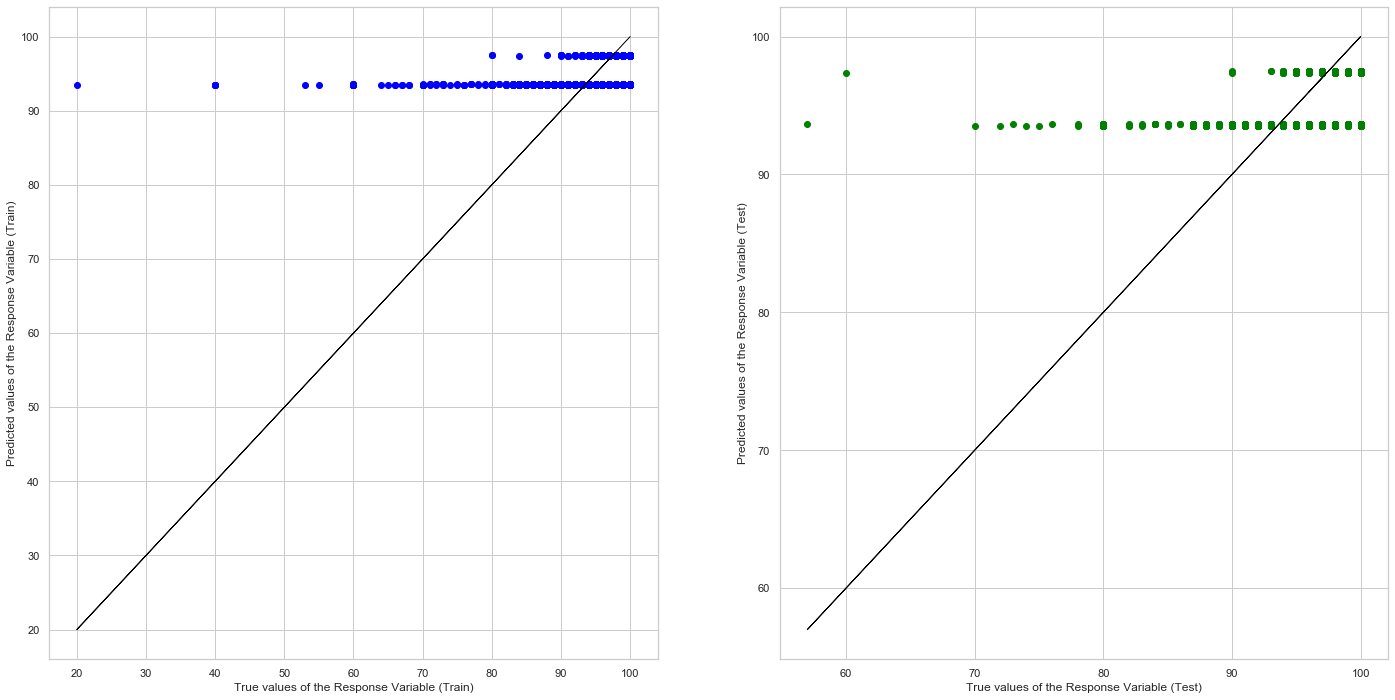

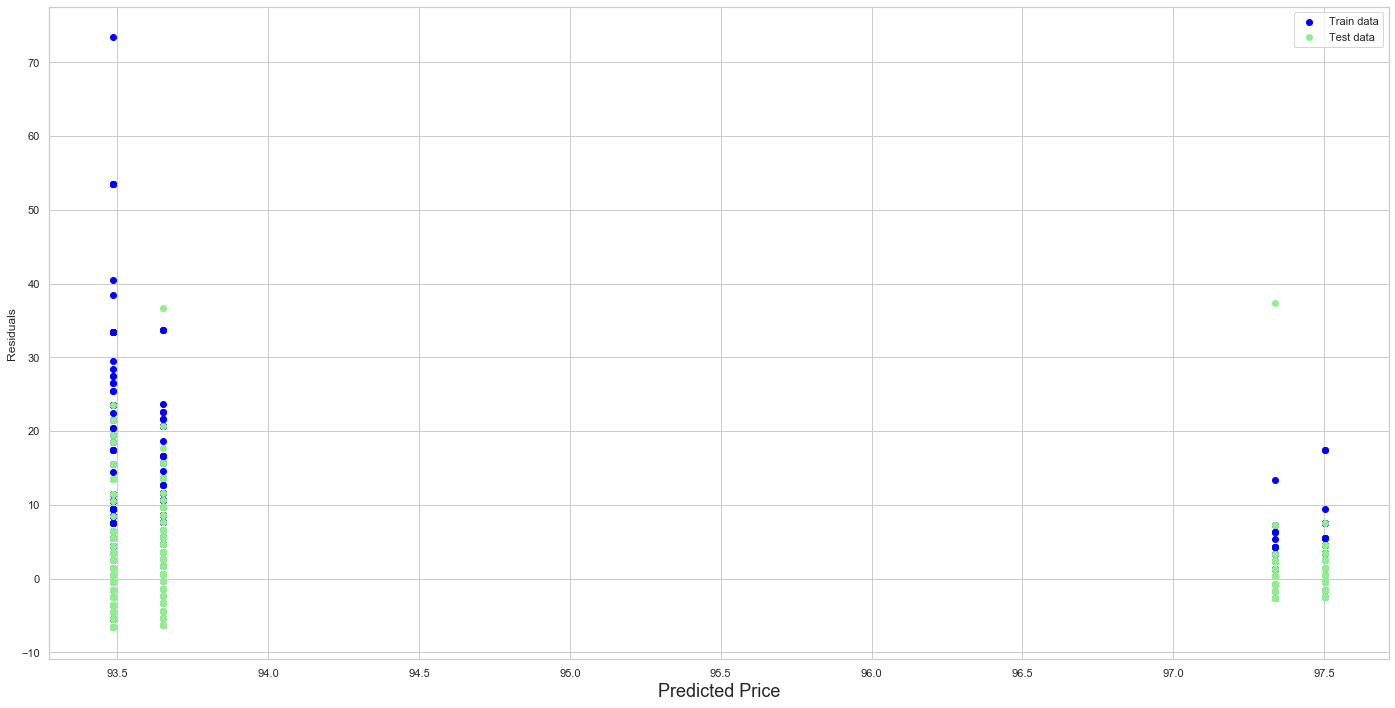

Explained Variance (R^2) on Train Set 	: 0.05761530529530678
Explained Variance (R^2) on Test Set 	: 0.05807995918931941


In [150]:
y_train_pred = linreg.predict(X_train)
# Plot the Predictions vs the True values
f, axes = plot.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plot.show()

plot.figure(figsize=(24,12))
plot.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plot.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plot.legend()
plot.xlabel('Predicted Price', fontsize=18)
plot.ylabel('Residuals')

plot.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, y_test))